# Project 3: Cars 4 U

### Objective

* Explore and visualize the dataset.
* Build a linear regression model to predict the prices of used cars.
* Generate a set of insights and recommendations that will help the business.


## 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

## 2. Load and Explore the Dataset

In [2]:
df = pd.read_csv("used_cars_data.csv", index_col=0)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 13 columns.


Name    Location  Year  \
S.No.                                                                
2397              Ford EcoSport 1.5 Petrol Trend     Kolkata  2016   
3777                      Maruti Wagon R VXI 1.2       Kochi  2015   
4425                      Ford Endeavour 4x2 XLT   Hyderabad  2007   
3661   Mercedes-Benz E-Class E250 CDI Avantgrade  Coimbatore  2016   
4514        Hyundai Xcent 1.2 Kappa AT SX Option       Kochi  2016   
599               Toyota Innova Crysta 2.8 ZX AT  Coimbatore  2019   
186    Mercedes-Benz E-Class E250 CDI Avantgrade   Bangalore  2014   
305       Audi A6 2011-2015 2.0 TDI Premium Plus       Kochi  2014   
4582                       Hyundai i20 1.2 Magna     Kolkata  2011   
5434            Honda WR-V Edge Edition i-VTEC S       Kochi  2019   

       Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
S.No.                                                                    
2397               21460    Petrol       Manual      First   17.0 kmpl   
3777               49818    Petrol       Manual      First   21.5 kmpl   
4425              130000    Diesel       Manual      First   13.1 kmpl   
3661               39753    Diesel    Automatic      First   13.0 kmpl   
4514               45560    Petrol    Automatic      First   16.9 kmpl   
599                40674    Diesel    Automatic      First  11.36 kmpl   
186                37382    Diesel    Automatic      First   13.0 kmpl   
305                61726    Diesel    Automatic      First  17.68 kmpl   
4582               36000    Petrol       Manual      First   18.5 kmpl   
5434               13913    Petrol       Manual      First   17.5 kmpl   

        Engine       Power  Seats   New_Price  Price  
S.No.                                                 
2397   1497 CC  121.36 bhp    5.0   9.47 Lakh   6.00  
3777   1197 CC   81.80 bhp    5.0   5.44 Lakh   4.11  
4425   2499 CC     141 bhp    7.0         NaN   6.00  
3661   2143 CC   201.1 bhp    5.0         NaN  35.28  
4514   1197 CC      82 bhp    5.0         NaN   6.34  
599    2755 CC   171.5 bhp    7.0  28.05 Lakh  24.82  
186    2143 CC   201.1 bhp    5.0         NaN  32.00  
305    1968 CC  174.33 bhp    5.0         NaN  20.77  
4582   1197 CC      80 bhp    5.0         NaN   2.50  
5434   1199 CC    88.7 bhp    5.0   9.36 Lakh   8.20

In [3]:
df.head()

Name    Location  Year  Kilometers_Driven  \
S.No.                                                                          
0                Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                          Honda Jazz V     Chennai  2011              46000   
3                     Maruti Ertiga VDI     Chennai  2012              87000   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

      Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  \
S.No.                                                                     
0           CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp   
1        Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp   
2        Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp   
3        Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp   
4        Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp   

       Seats  New_Price  Price  
S.No.                           
0        5.0        NaN   1.75  
1        5.0        NaN  12.50  
2        5.0  8.61 Lakh   4.50  
3        7.0        NaN   6.00  
4        5.0        NaN  17.74

In [4]:
df.describe()

Year  Kilometers_Driven        Seats        Price
count  7253.000000       7.253000e+03  7200.000000  6019.000000
mean   2013.365366       5.869906e+04     5.279722     9.479468
std       3.254421       8.442772e+04     0.811660    11.187917
min    1996.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.341600e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000

In [5]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

### Observations
* Most of the cars in the dataset have no data for new price (6247)
* 1234 have no data for used price

In [6]:
# since there is so little data for new_price in the set lets drop that column
# our objective is to predict the price of used cars so the new price isn't that relevant
df.drop(['New_Price'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 736.6+ KB


## 3. Change some of the categorical types to numerics & drop or impute NAN values

In [8]:
df.head()

Name    Location  Year  Kilometers_Driven  \
S.No.                                                                          
0                Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                          Honda Jazz V     Chennai  2011              46000   
3                     Maruti Ertiga VDI     Chennai  2012              87000   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

      Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  \
S.No.                                                                     
0           CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp   
1        Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp   
2        Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp   
3        Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp   
4        Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp   

       Seats  Price  
S.No.                
0        5.0   1.75  
1        5.0  12.50  
2        5.0   4.50  
3        7.0   6.00  
4        5.0  17.74

In [9]:
# Lets remove the kmpl and km/kg strings from the mileage set
# These are similar measurements so removing the tags shouldn't disturb the interpretation
df['Mileage'] = df['Mileage'].str.replace(r'kmpl', '')
df['Mileage'] = df['Mileage'].str.replace(r'km/kg', '')
df['Mileage']

S.No.
0        26.6 
1       19.67 
2        18.2 
3       20.77 
4        15.2 
         ...  
7248    20.54 
7249    17.21 
7250    23.08 
7251     17.2 
7252     10.0 
Name: Mileage, Length: 7253, dtype: object

In [10]:
#convert Mileage to a float value
df['Mileage'] = df['Mileage'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 736.6+ KB


In [12]:
#only 2 missing values for mileage - let's impute the mean
print(df['Mileage'].isnull().sum())
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)  # mean imputation
df['Mileage'].isnull().sum()

2


0

In [13]:
# remove 'CC' from Engine so we can convert it to integer type
df['Engine'] = df['Engine'].str.replace(r'CC', '')

In [14]:
# some engine sizes are NAN values, lets impute the mean since there's only a few


In [15]:
df['Engine'] = df['Engine'].astype(float)
# we don't need engine to be float but since there are missing values Nan floats can't be converted to integer

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 736.6+ KB


In [17]:
# Since there are only 46 missing values for engine lets impute the mean size for those missing
print(df['Engine'].isnull().sum())
df['Engine'].fillna(df['Engine'].mean(), inplace=True)  # mean imputation
df['Engine'].isnull().sum()

46


0

In [18]:
# now we can convert engine size to integer instead of float so its a little easier to work with
df['Engine'] = df['Engine'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7253 non-null   int64  
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 736.6+ KB


In [20]:
# lets also fill in the mean value for missing 'seats' and covert it to integer
print(df['Seats'].isnull().sum())
df['Seats'].fillna(df['Seats'].mean(), inplace=True)  # mean imputation
df['Seats'].isnull().sum()

53


0

In [21]:
df['Seats'] = df['Seats'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7253 non-null   int64  
 9   Power              7207 non-null   object 
 10  Seats              7253 non-null   int64  
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 736.6+ KB


In [23]:
df.shape

(7253, 12)

In [24]:
df['Power'].unique

<bound method Series.unique of S.No.
0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
7248    103.6 bhp
7249    103.6 bhp
7250     63.1 bhp
7251    103.6 bhp
7252      170 bhp
Name: Power, Length: 7253, dtype: object>

In [25]:
# lets remove the 'bhp' tag from Power and convert it to a float value
df['Power'] = df['Power'].str.replace(r'bhp', '')
print(df['Power'])

S.No.
0       58.16 
1       126.2 
2        88.7 
3       88.76 
4       140.8 
         ...  
7248    103.6 
7249    103.6 
7250     63.1 
7251    103.6 
7252      170 
Name: Power, Length: 7253, dtype: object


In [26]:
df['Power']

S.No.
0       58.16 
1       126.2 
2        88.7 
3       88.76 
4       140.8 
         ...  
7248    103.6 
7249    103.6 
7250     63.1 
7251    103.6 
7252      170 
Name: Power, Length: 7253, dtype: object

In [27]:
df['Power'].isnull

<bound method Series.isnull of S.No.
0       58.16 
1       126.2 
2        88.7 
3       88.76 
4       140.8 
         ...  
7248    103.6 
7249    103.6 
7250     63.1 
7251    103.6 
7252      170 
Name: Power, Length: 7253, dtype: object>

In [28]:
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                  46
Seats                   0
Engine                  0
Mileage                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [29]:
 # df['Power'] = df['Power'].astype(float)
# if we run this we get an error becuase some of the NAN Power values are formatted wrong

* We get the error above because some values of the Power column have the string text 'null bhp' instead of blank text
* we need to replace these with blanks

In [30]:
# we need to replace this 'null ' string with no values
df['Power'].replace('null ', np.nan, inplace=True)

In [31]:
#perfect, now that this null space string has been replaced with properly formatted NAN values we can continue
#notice the actual amount of null Power values has increased significantly
# it's still a pretty small amount out of the larger dataset though
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                   0
Engine                  0
Mileage                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [32]:
df['Power'] = df['Power'].astype(float)

In [33]:
# We have successfully converted Power to a numeric float value and filled in all its missing values
print(df['Power'].isnull().sum())
df['Power'].fillna(df['Power'].mean(), inplace=True)  # mean imputation
df['Power'].isnull().sum()

175


0

In [34]:
df.isnull().sum().sort_values(ascending=False)

Price                1234
Seats                   0
Power                   0
Engine                  0
Mileage                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

## The only Column left with missing data is the Price column
#### Given that used car price is what we are trying to primarily analyze in this dataset, and the large number of missing values, we probably shouldn't try to impute mean data as that could cause significant errors in our analysis. Therefor we should drop the rows with missing Price data.

In [35]:
# since we only have one variable with missing data left we can use a simple dropna() function to remove
# all the rows with missing data
df = df.dropna()

* now we're down to just 6019 rows and 12 columns from 7253 rows and 13 columns

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   int64  
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   int64  
 11  Price              6019 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 611.3+ KB


In [37]:
np.random.seed(1)
df.sample(n=10)

Name    Location  Year  \
S.No.                                                                     
2319                    Mercedes-Benz E-Class E 350 d  Coimbatore  2019   
3652                Maruti SX4 Zxi with Leather BSIII  Coimbatore  2008   
2397                   Ford EcoSport 1.5 Petrol Trend     Kolkata  2016   
3536                                  Honda City V MT       Kochi  2018   
4400             Volkswagen Polo Petrol Highline 1.6L     Kolkata  2011   
5347                    Maruti Alto 800 2016-2019 LXI      Mumbai  2018   
2852   Mercedes-Benz B Class 2012-2015 B200 Sport CDI   Bangalore  2014   
4894                       Maruti Baleno Alpha Diesel   Hyderabad  2017   
1897                         Renault Scala Diesel RxL     Kolkata  2013   
3663                      Hyundai Xcent 1.1 CRDi Base        Pune  2017   

       Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
S.No.                                                                         
2319                9312    Diesel    Automatic      First    18.00    2987   
3652               77325    Petrol       Manual      First    15.60    1586   
2397               21460    Petrol       Manual      First    17.00    1497   
3536               11966    Petrol       Manual      First    16.80    1497   
4400               46000    Petrol       Manual      First    15.26    1598   
5347               11000    Petrol       Manual      First    24.70     796   
2852               36000    Diesel    Automatic      First    15.00    2147   
4894               24000    Diesel       Manual      First    27.39    1248   
1897               40000    Diesel       Manual      First    21.64    1461   
3663               73000    Diesel       Manual      First    24.40    1120   

        Power  Seats  Price  
S.No.                        
2319   258.00      5  78.80  
3652   104.68      5   3.51  
2397   121.36      5   6.00  
3536   116.30      5  10.28  
4400   103.50      5   2.35  
5347    47.30      5   3.35  
2852   107.30      5  16.25  
4894    74.00      5   8.40  
1897    84.80      5   4.00  
3663    71.00      5   4.50

### We have succesfully cleaned up the data, removing or filling missing values, and changing some categorical variables to numeric variables

## 4. Convert Some objects to Categoricals & convert to One-Hot Encoding

In [38]:
cat_vars = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
# The Name Variable has too many variables to encode one-hot
# and I wouldn't dummy encode them as such

for colname in cat_vars:
    df[colname] = df[colname].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   category
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   int64   
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   int64   
 11  Price              6019 non-null   float64 
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 447.6+ KB


### Encoding categorical columns
* we'll convert category variables to one-hot encoding in order to add individual colums for each type of data input
* This will essentially let us more easily segment and work with the data

In [39]:
pd.get_dummies(df['Location'], drop_first=True)

Bangalore  Chennai  Coimbatore  Delhi  Hyderabad  Jaipur  Kochi  \
S.No.                                                                    
0              0        0           0      0          0       0      0   
1              0        0           0      0          0       0      0   
2              0        1           0      0          0       0      0   
3              0        1           0      0          0       0      0   
4              0        0           1      0          0       0      0   
...          ...      ...         ...    ...        ...     ...    ...   
6014           0        0           0      1          0       0      0   
6015           0        0           0      0          0       1      0   
6016           0        0           0      0          0       1      0   
6017           0        0           0      0          0       0      0   
6018           0        0           0      0          1       0      0   

       Kolkata  Mumbai  Pune  
S.No.                         
0            0       1     0  
1            0       0     1  
2            0       0     0  
3            0       0     0  
4            0       0     0  
...        ...     ...   ...  
6014         0       0     0  
6015         0       0     0  
6016         0       0     0  
6017         1       0     0  
6018         0       0     0  

[6019 rows x 10 columns]

In [40]:
pd.get_dummies(df['Fuel_Type'], drop_first=True)

Diesel  Electric  LPG  Petrol
S.No.                               
0           0         0    0       0
1           1         0    0       0
2           0         0    0       1
3           1         0    0       0
4           1         0    0       0
...       ...       ...  ...     ...
6014        1         0    0       0
6015        1         0    0       0
6016        1         0    0       0
6017        0         0    0       1
6018        1         0    0       0

[6019 rows x 4 columns]

In [41]:
pd.get_dummies(df['Transmission'], drop_first=True)

Manual
S.No.        
0           1
1           1
2           1
3           1
4           0
...       ...
6014        1
6015        1
6016        1
6017        1
6018        1

[6019 rows x 1 columns]

In [42]:
pd.get_dummies(df['Owner_Type'], drop_first=True)

Fourth & Above  Second  Third
S.No.                               
0                   0       0      0
1                   0       0      0
2                   0       0      0
3                   0       0      0
4                   0       1      0
...               ...     ...    ...
6014                0       0      0
6015                0       0      0
6016                0       1      0
6017                0       0      0
6018                0       0      0

[6019 rows x 3 columns]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   category
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   int64   
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   int64   
 11  Price              6019 non-null   float64 
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 447.6+ KB


In [44]:
# We won't insert these additional columns into our dataframe until it is required

## 5. Exploratory Data Analysis

### Univariate analysis

In [45]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [46]:
df.head()

Name    Location  Year  Kilometers_Driven  \
S.No.                                                                          
0                Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                          Honda Jazz V     Chennai  2011              46000   
3                     Maruti Ertiga VDI     Chennai  2012              87000   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

      Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
S.No.                                                                           
0           CNG       Manual      First    26.60     998   58.16      5   1.75  
1        Diesel       Manual      First    19.67    1582  126.20      5  12.50  
2        Petrol       Manual      First    18.20    1199   88.70      5   4.50  
3        Diesel       Manual      First    20.77    1248   88.76      7   6.00  
4        Diesel    Automatic     Second    15.20    1968  140.80      5  17.74

<AxesSubplot:xlabel='Location', ylabel='count'>

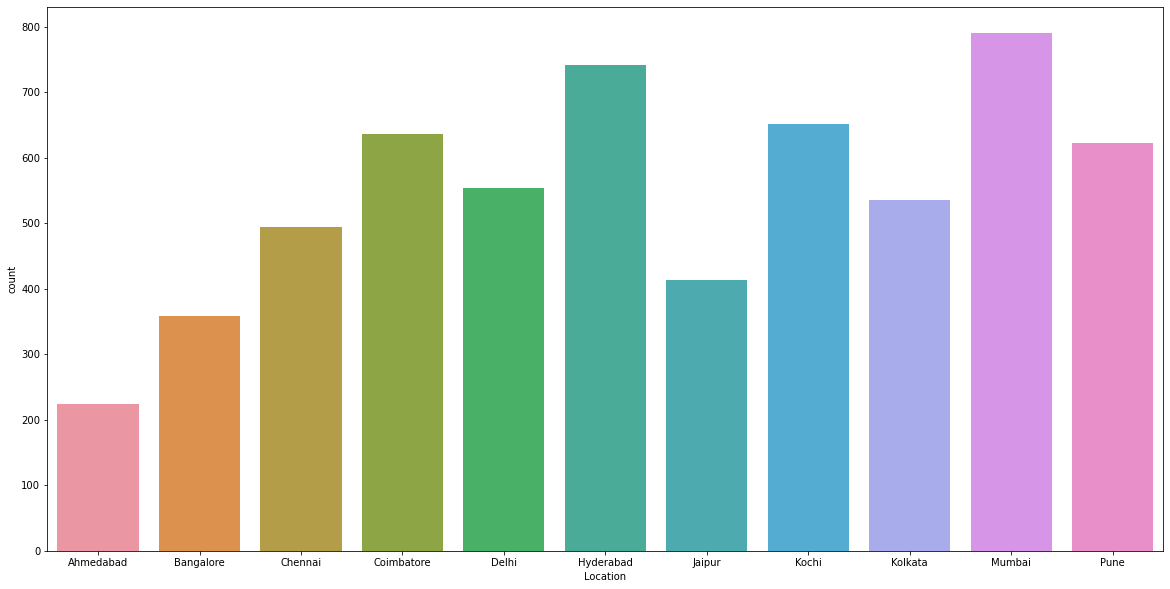

In [47]:
# lets see the split in our dataset sorted by country
# Mumbai and Hyderabad have the highest rep, while Ahmedabad has the lowest
# all locations look have decent representation likely inline with their population sizes
plt.figure(figsize=(20,10))
sns.countplot(df['Location'])

### Lets explore the Year of vehicle in the dataset

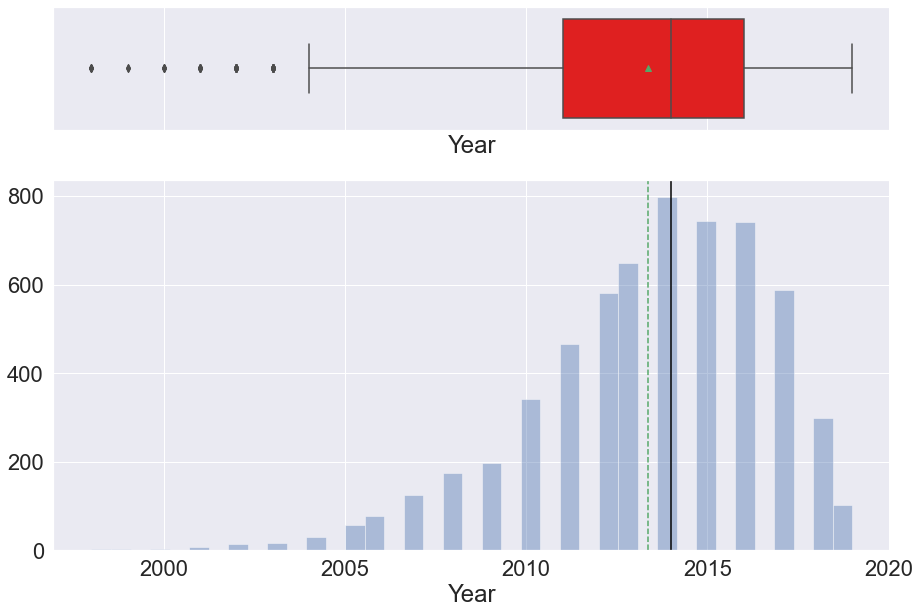

In [48]:
histogram_boxplot(df.Year)

* We can see the spread of vehicle years in our data is pretty wide, ranging from pre-2000 up to 2019
* Their appears to be a few outlier values below 2005, this is probably why the Mean value (green line) falls slightly below the Median (black line)

### Lets explore the Kilometers Driven variable

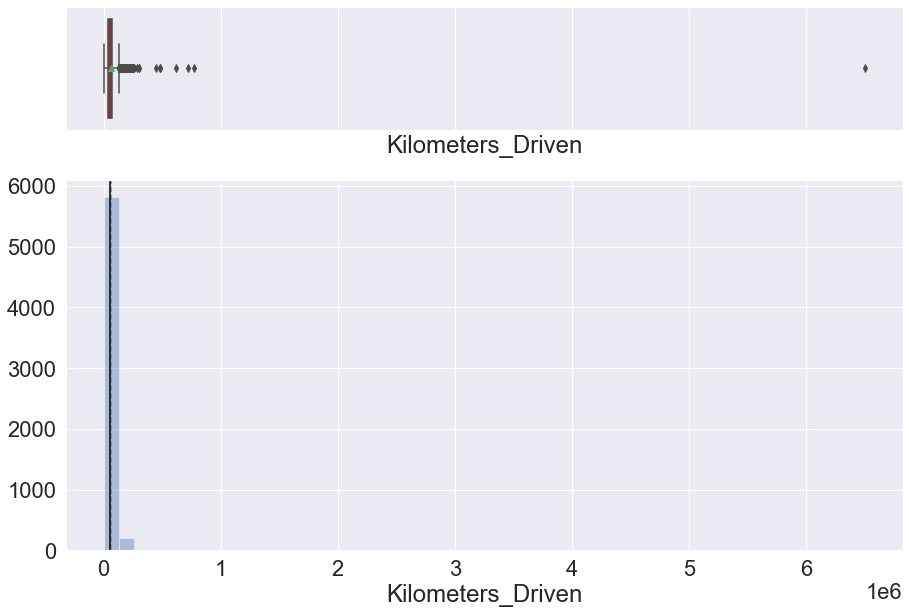

In [49]:
histogram_boxplot(df.Kilometers_Driven)

* There appears to be an outlier throwing our KM Driven graphs off. This is likely an error in the data, let's explore

<AxesSubplot:xlabel='Kilometers_Driven'>

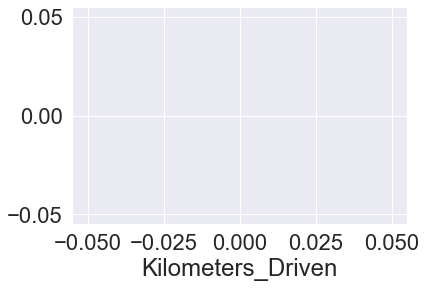

In [50]:
sns.scatterplot(df.Kilometers_Driven)

In [51]:
df.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  6019.000000       6.019000e+03  6019.000000  6019.000000  6019.000000   
mean   2013.358199       5.873838e+04    18.134963  1621.244891   113.241460   
std       3.269742       9.126884e+04     4.581528   599.554003    53.231071   
min    1998.000000       1.710000e+02     0.000000    72.000000    34.200000   
25%    2011.000000       3.400000e+04    15.170000  1198.000000    78.000000   
50%    2014.000000       5.300000e+04    18.150000  1493.000000    98.600000   
75%    2016.000000       7.300000e+04    21.100000  1969.000000   138.030000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   560.000000   

             Seats        Price  
count  6019.000000  6019.000000  
mean      5.276790     9.479468  
std       0.806346    11.187917  
min       0.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.640000  
75%       5.000000     9.950000  
max      10.000000   160.000000

In [52]:
# indeed it appears the maximum value for mileage is exponentially higher than the 75% quantile
# since we can't glean anything from the variable until this is remedied let's treat the outlier now

In [53]:
Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

39000.0


In [54]:
# this will get the IQR score of the KM Driven var and remove those outlier values which fall
# outside 1.5* the IQR in each direction
Q1=df['Kilometers_Driven'].quantile(0.25) # 25th quantile
Q3=df['Kilometers_Driven'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR 
Upper_Whisker = Q3 + 1.5*IQR
df['Kilometers_Driven'] = np.clip(df['Kilometers_Driven'], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 


In [55]:
df.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  6019.000000        6019.000000  6019.000000  6019.000000  6019.000000   
mean   2013.358199       56106.896661    18.134963  1621.244891   113.241460   
std       3.269742       30040.626708     4.581528   599.554003    53.231071   
min    1998.000000         171.000000     0.000000    72.000000    34.200000   
25%    2011.000000       34000.000000    15.170000  1198.000000    78.000000   
50%    2014.000000       53000.000000    18.150000  1493.000000    98.600000   
75%    2016.000000       73000.000000    21.100000  1969.000000   138.030000   
max    2019.000000      131500.000000    33.540000  5998.000000   560.000000   

             Seats        Price  
count  6019.000000  6019.000000  
mean      5.276790     9.479468  
std       0.806346    11.187917  
min       0.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.640000  
75%       5.000000     9.950000  
max      10.000000   160.000000

* We can see the Kilometers_Driven variable now caps out at 131,500 vs. 6.5 million!

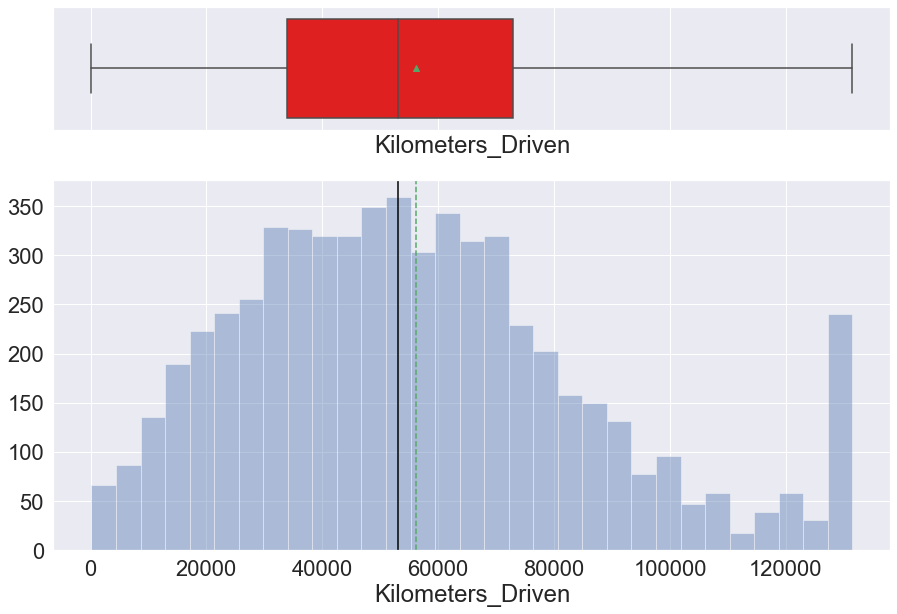

In [56]:
histogram_boxplot(df.Kilometers_Driven)

* Now that the outlier datapoint is removed we see a pretty normal distribution with a right skew at the top end around the KM_Driven variable with central tendency around the mid 50,000 mark, and a higher values around the 130,000 mark,
* this right skew pushed our mean a little higher than our median by over 3000 miles

### Lets explore the Mileage (fuel efficiency) variable

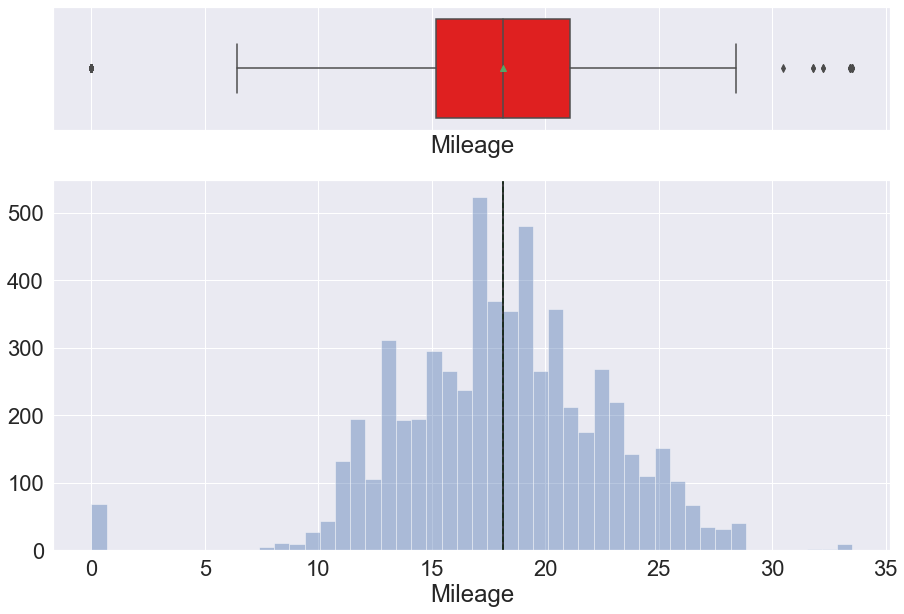

In [57]:
histogram_boxplot(df.Mileage)

* This shows some interesting data, The graph is very normally distributed with a few outlier values at the top
* oddly it's showing several values at 0 on the low end 
* we should treat those before moving forward

In [58]:
# lets treat those 0 values as NAN values and impute the mean
# we need to replace this 'null ' string with no values
df['Mileage'].replace(0, np.nan, inplace=True)

In [59]:
df.isnull().sum().sort_values(ascending=False)

Mileage              68
Price                 0
Seats                 0
Power                 0
Engine                0
Owner_Type            0
Transmission          0
Fuel_Type             0
Kilometers_Driven     0
Year                  0
Location              0
Name                  0
dtype: int64

In [60]:
print(df['Mileage'].isnull().sum())
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)  # mean imputation
df['Mileage'].isnull().sum()

68


0

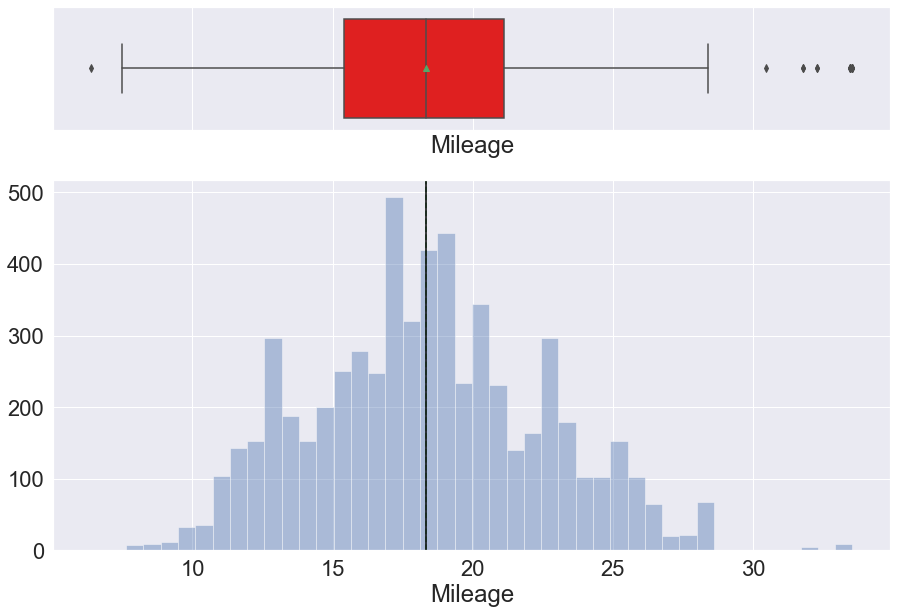

In [61]:
histogram_boxplot(df.Mileage)

* We have successfully removed the 0 values for mileage from the dataset
* Now our boxplot and graph look more reasonable and our data should be more accurate

### Lets explore the Engine (size) variable

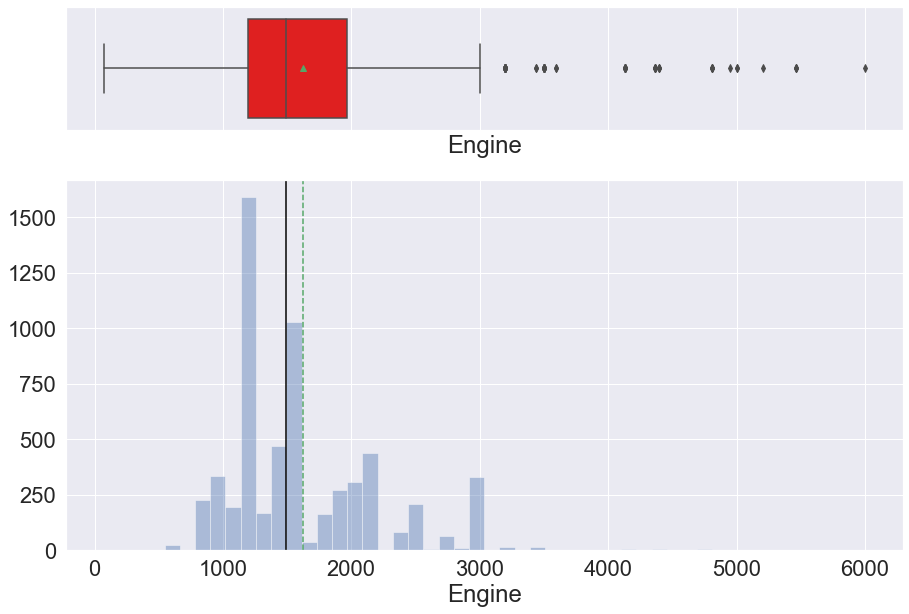

In [62]:
histogram_boxplot(df.Engine)

* There's a very wide range of engine sizes represented in the set
* several outlier values on the top end
* it may be important to retain these outlier as they represent a large part of the data

In [63]:
### Lets explore the Power variable

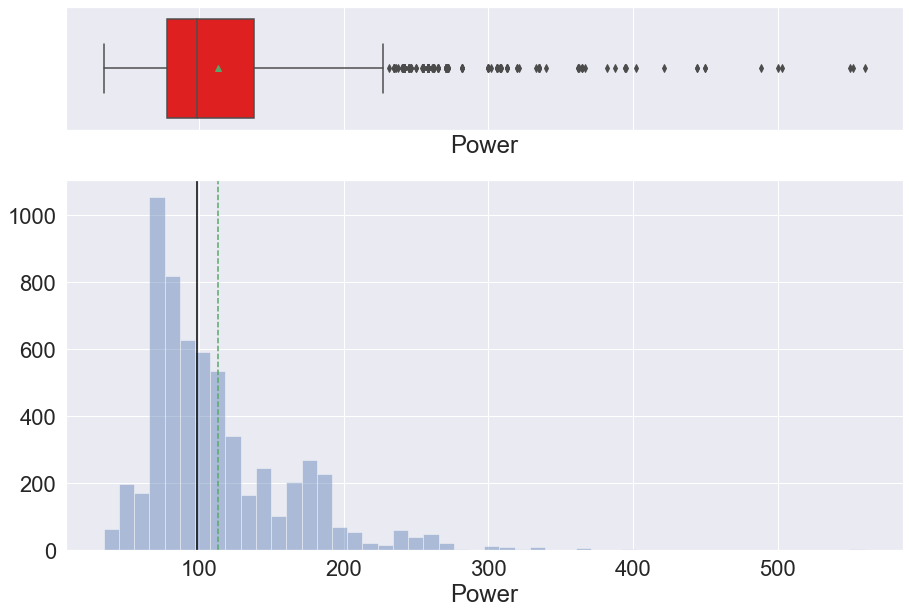

In [64]:
histogram_boxplot(df.Power)

* As with engine size there is a significant right skew on the power graph
* There are several outlier power variables above about 200 

### Lets explore the Seats variable

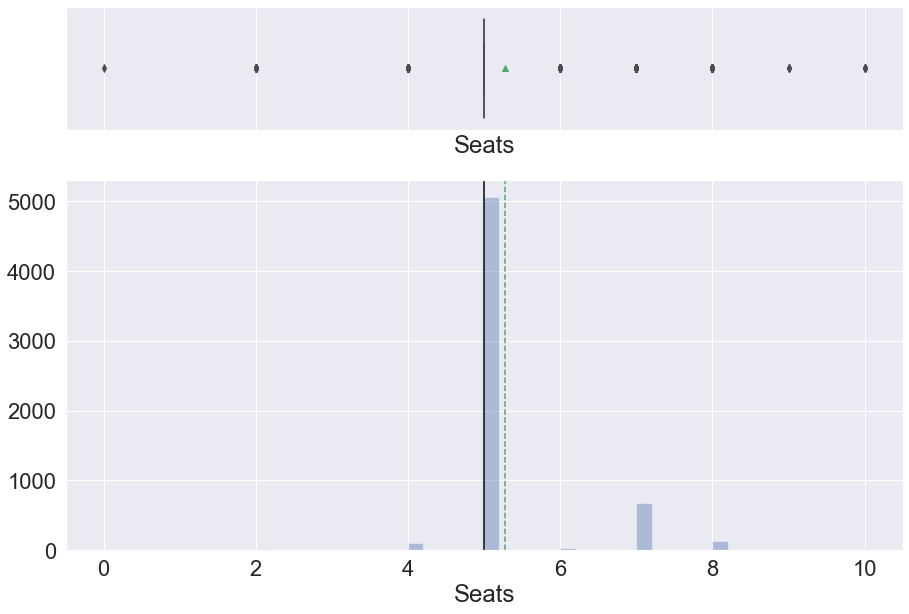

In [65]:
histogram_boxplot(df.Seats)

* The vast majority of vehicles in the set appear to be 5 seaters
* Looks like there is one vehicle listed as having 0 - lets fix that

In [66]:
# lets treat those 0 values as NAN values and impute the median
# we need to replace this 'null ' string with no values
df['Seats'].replace(0, np.nan, inplace=True)

In [67]:
print(df['Seats'].isnull().sum())
df['Seats'].fillna(df['Seats'].median(), inplace=True)  # median imputation
df['Seats'].isnull().sum()
# we impute the mean because seats have to be a whole number


1


0

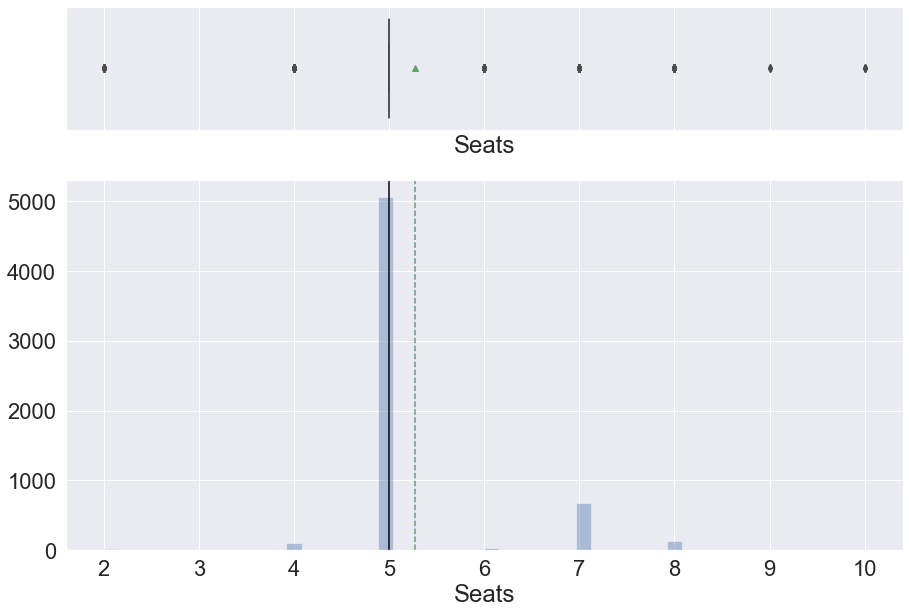

In [68]:
histogram_boxplot(df.Seats)

* removed the 0 value for seats, now ranges from 2 to 10

## Lets explore our dependent Price variable

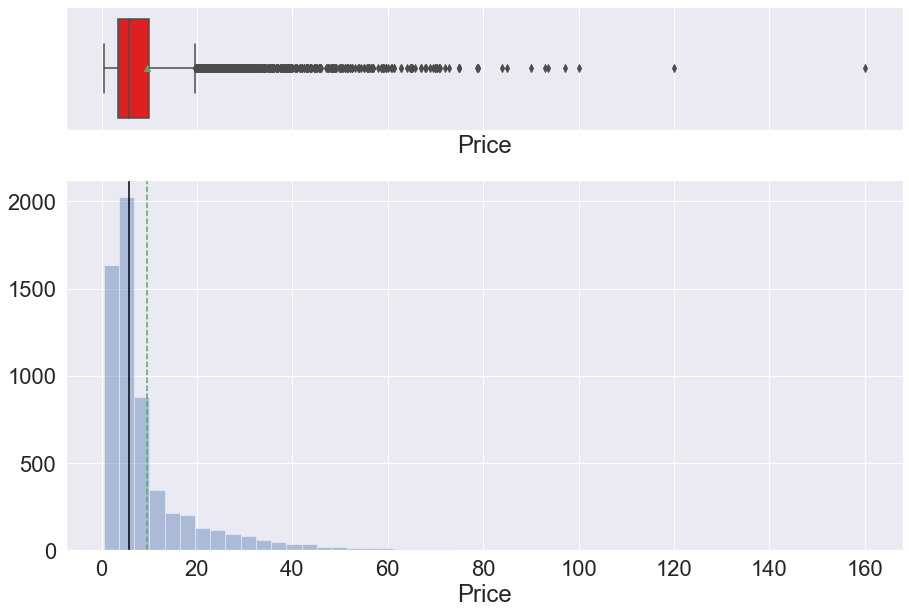

In [69]:
histogram_boxplot(df.Price)

* Our price variable histogram is severly right skewed and the box plot shows a multitude of outlier values

## Let's just print the Distribution of each numerical variable

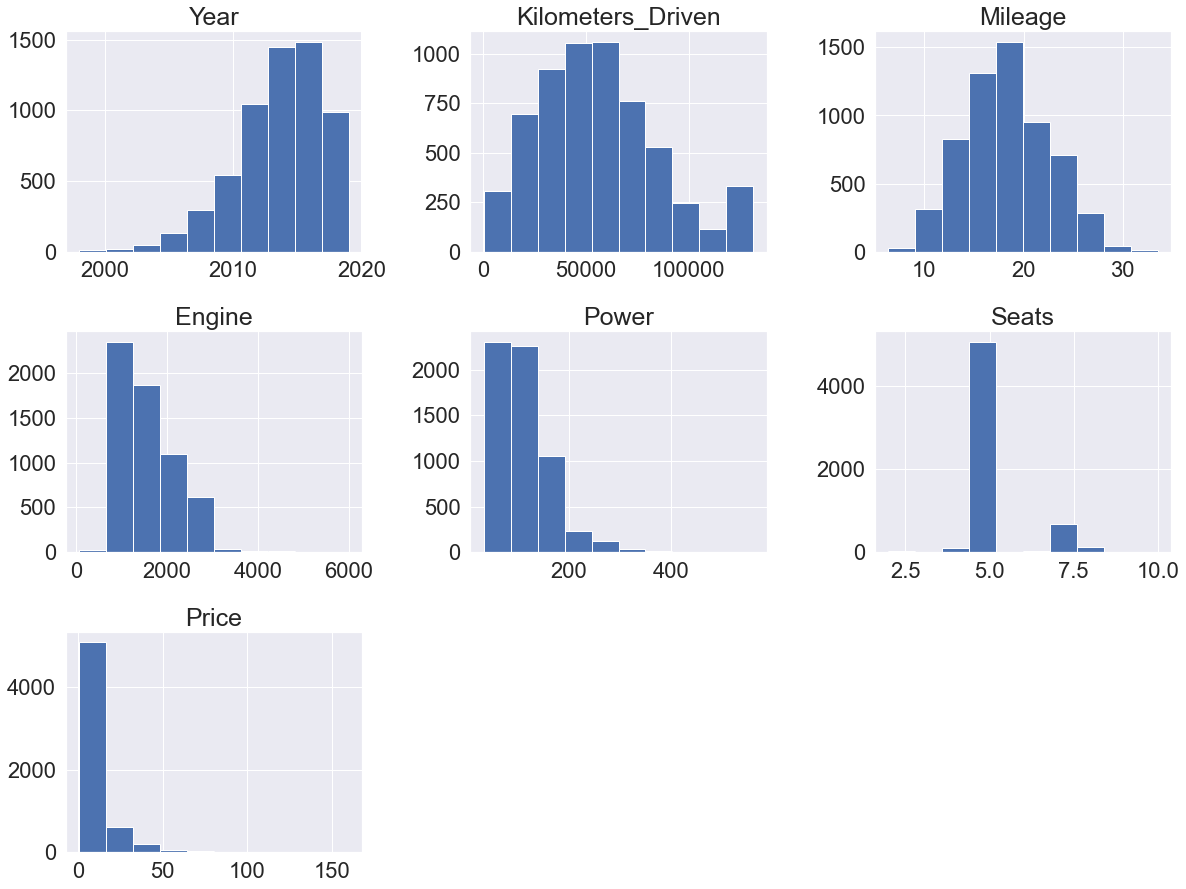

In [70]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

#### Observations
* The Vehicle years skew to newer cars
* Kilometers driven is pretty spread out
* Mileage is very evenly distributed
* Engine sizes skew left with most vehicles appearing to have engines <3000 cc
* Power skews left with most cars having poer levels below 200
* Seats mostly center around 5 with a several around 7-8 (presumably vans and suvs)
* Price is skewed heavily to the left wit most vehicles priced well below 50 INR Lakhs 

## Lets look at outliers in every numerical column

In [71]:
# This lets us simply separate only the numeric values from the dataset
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

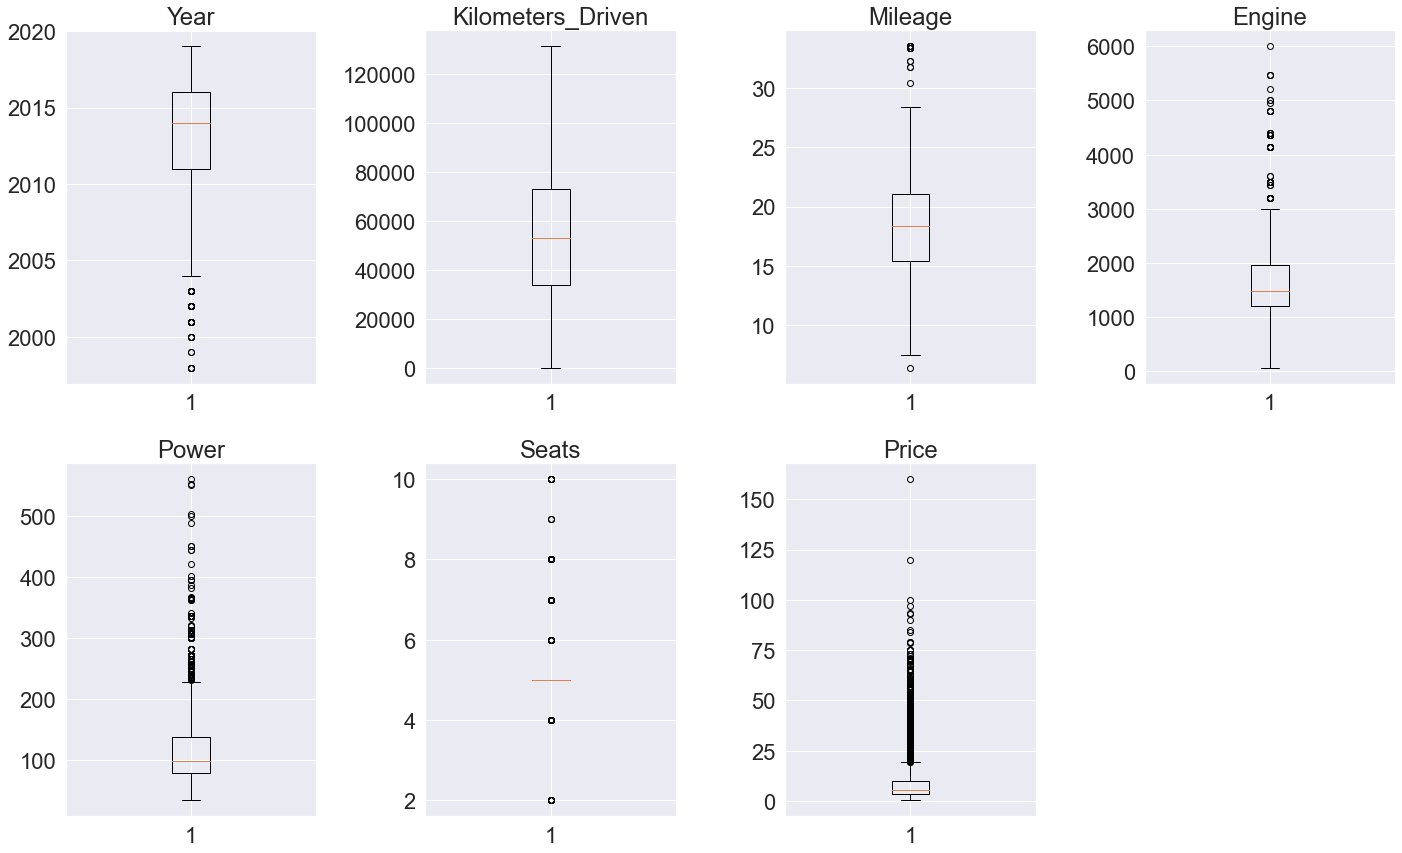

In [72]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

#### Observations
* Outliers exist in all of our numeric variables (except KM_driven because we already removed them)
* The highest amount of outliers is in Price (upper), then Power (upper), then Engine (upper), then Year (lower), then Mileage (upper mostley)

## Bi-Variate Analysis

### Lets plot a heatmap to look for correlations in our data

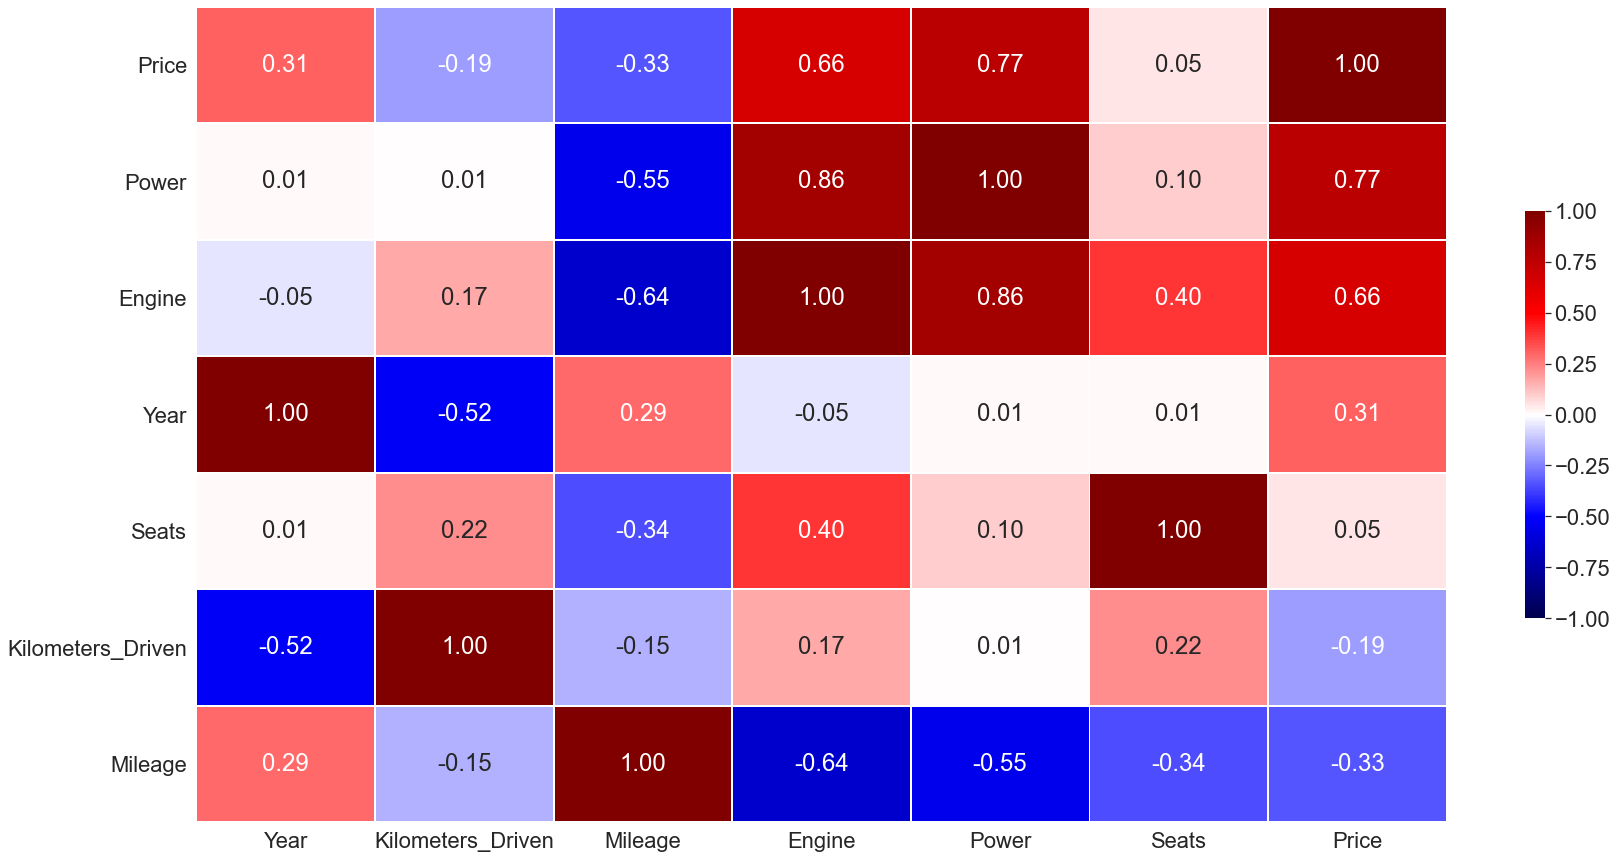

In [73]:
corr = df[numeric_columns].corr().sort_values(by=['Price'],ascending=False) # sorting correlations by Price

f, ax = plt.subplots(figsize=(28, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".2f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

#### Observations
* Price is highly positively correlated with Engine, and Power, suggesting more powerful cars yield a higher price tag
* Price is weakly positively correlated with Year (.3) - newer cars may yield higher price
* Price is weakly negatively correlated with Kilometers_Driven (-.19) and Mileage (-.33) - lower KM used cars and cars with worse gas mileage may yield higher price

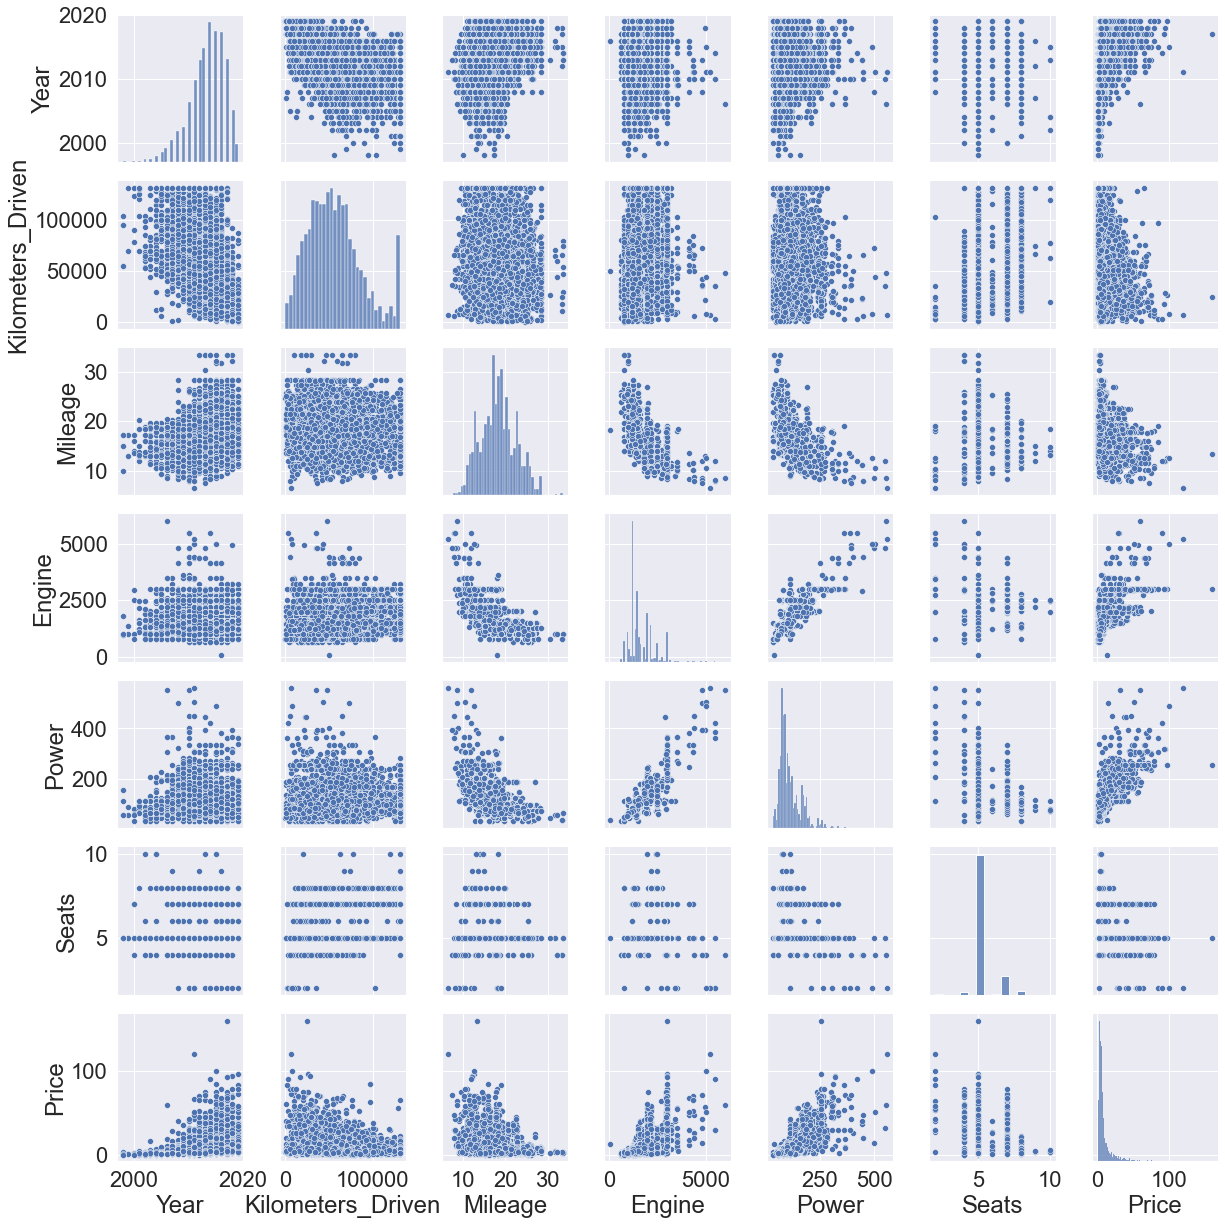

In [74]:
sns.pairplot(df)

#### Observations
* Pairplot shows relationship between numeric variables
* We can see some apparent relationships that weren't as apparent in the heatmap
* Although Price is only has a .3 correlation with year, on the pairplot we see the majority of higher priced cars are also newer
* We can also see the pricier cars also generally have lower mileage

### Price with location 

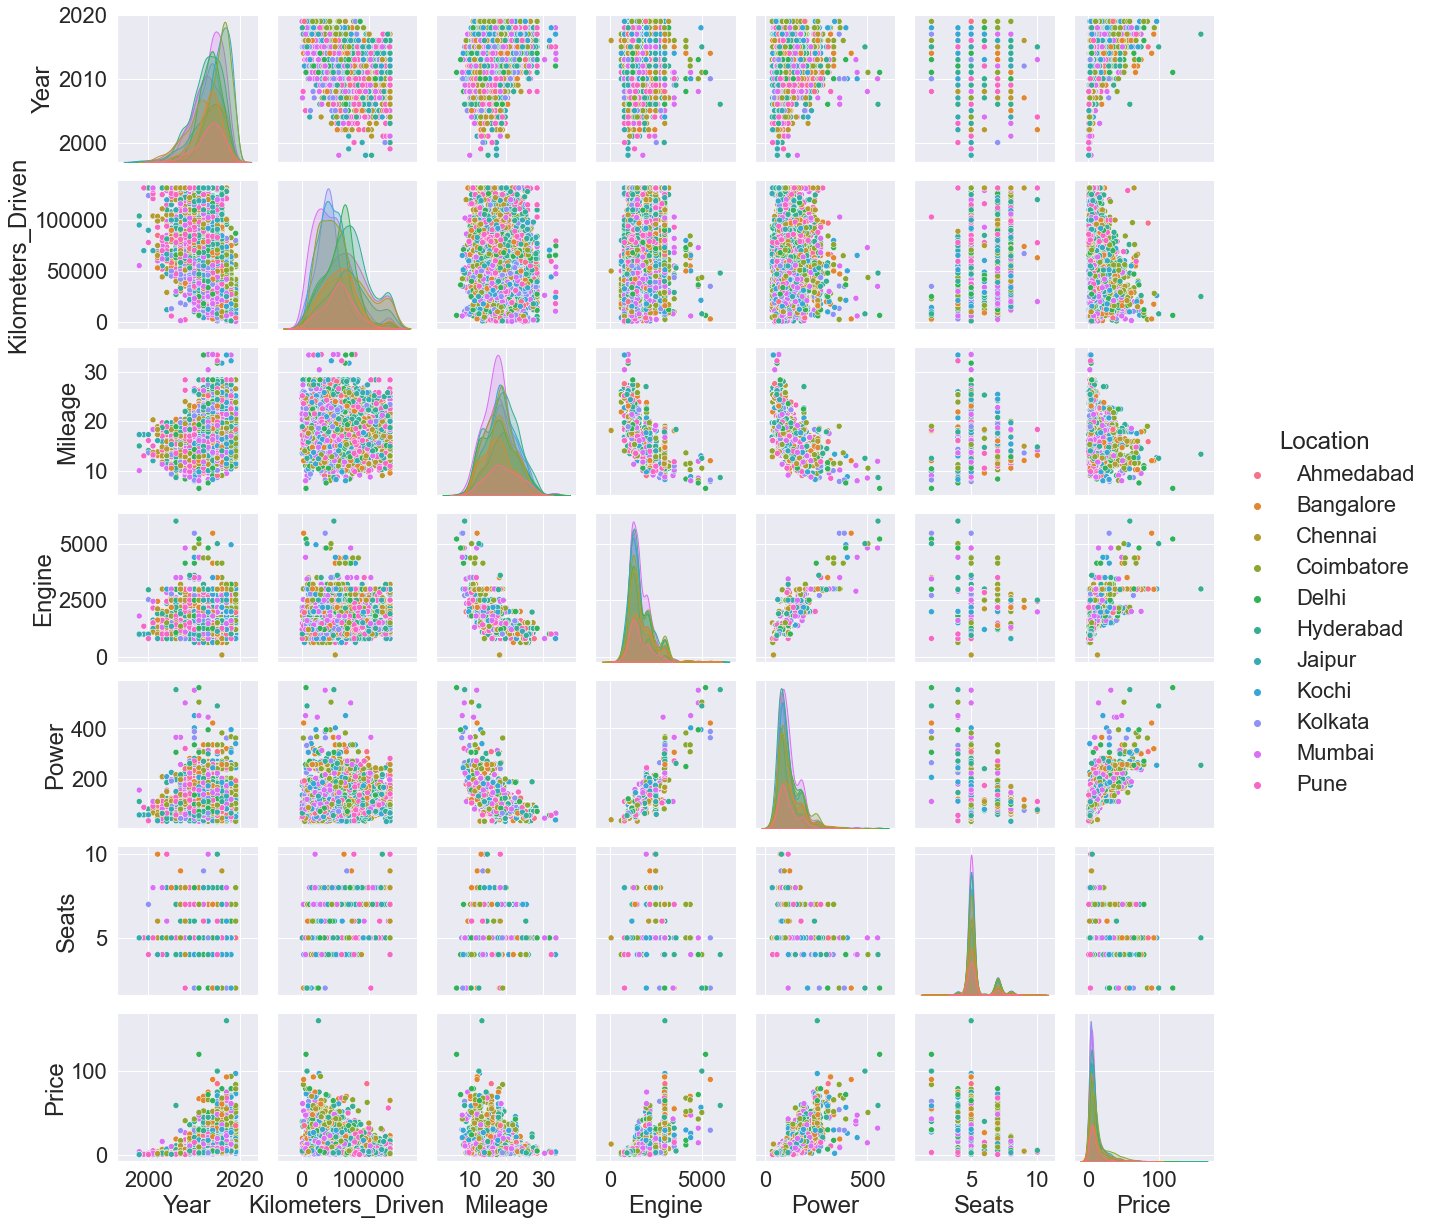

In [75]:
sns.pairplot(df, hue='Location')

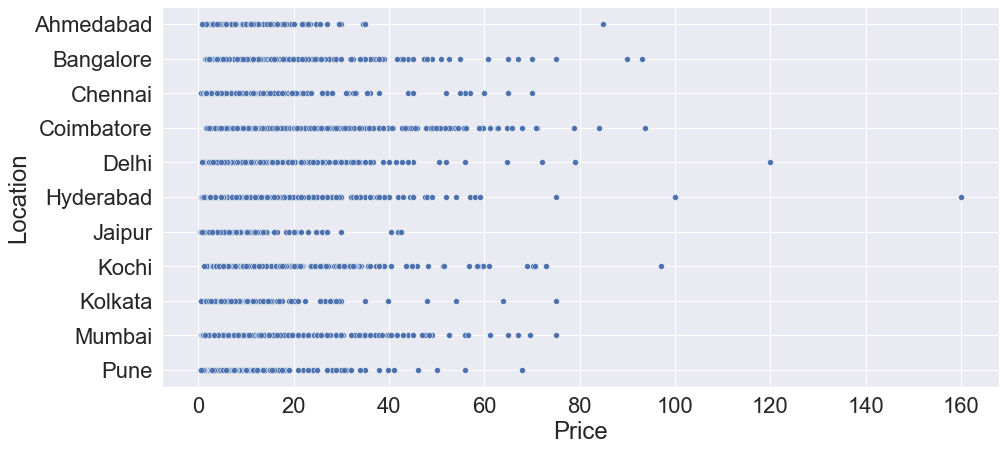

In [76]:
# it's hard to see the differences with the cramped pairplot
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='Price', y='Location', data=df) # scatter plot 
plt.show()

#### Observations
* Some cities appear to have lower overall prices than others, but there is heavy overlap in the bottom end of the price scale
* Ahmedabad, Jaipur, and Kolkata appear to have the lowest prices, the other cities appear similar to one-another

### Price with Transmission Type

In [77]:
#sns.pairplot(df, hue='Transmission')

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

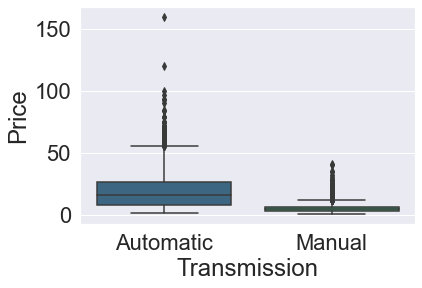

In [78]:
sns.boxplot(df["Transmission"], df["Price"],palette="viridis")

#### Observations
* This separates the pairplot data based on transmission type
* We can see manual transmission vehicles tend to lie in the lower end of the price range
* commented out pairplot to reduce runtime

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   category
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   int64   
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(4), float64(4), int64(3), object(1)
memory usage: 607.6+ KB


### Price with Fuel Type

In [80]:
#sns.pairplot(df, hue='Fuel_Type')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

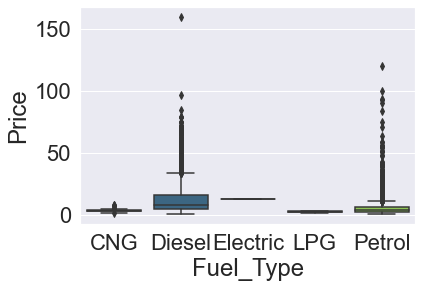

In [81]:
sns.boxplot(df["Fuel_Type"], df["Price"],palette="viridis")

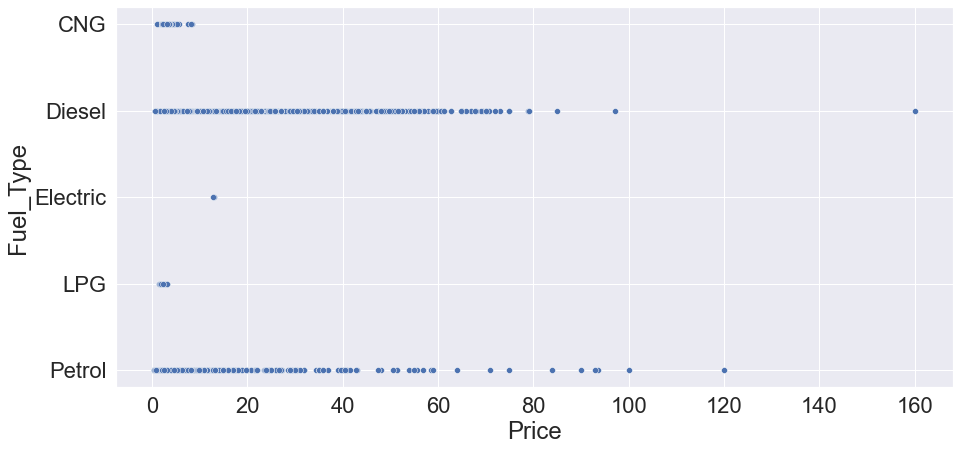

In [82]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='Price', y='Fuel_Type', data=df) # scatter plot 
plt.show()

#### Observation
* The visualizations indicate a wide range of price difference by fuel_type
* Diesels look to command a higher average price vs petrol, it doesn't look like we have a lot of data for the other types
* commented out pairplot to reduce runtime
* 


### Price with Owner Type

In [83]:
#sns.pairplot(df, hue='Owner_Type')

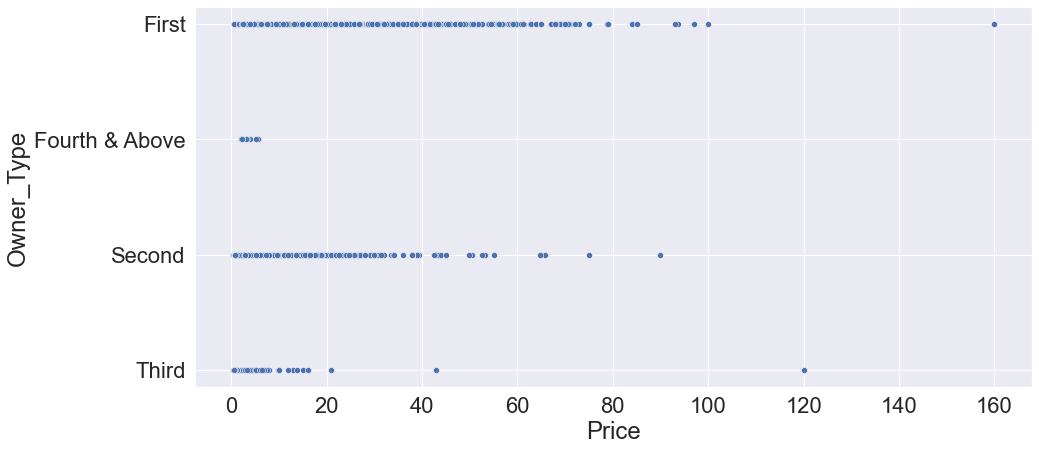

In [84]:
# it's hard to see the differences with the cramped pairplot
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='Price', y='Owner_Type', data=df) # scatter plot 
plt.show()

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

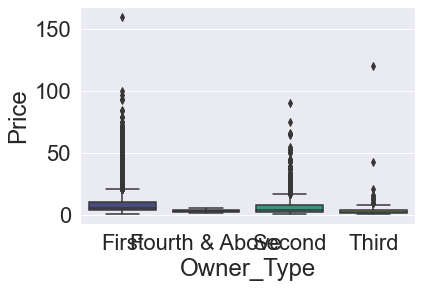

In [85]:
sns.boxplot(df["Owner_Type"], df["Price"],palette="viridis")

#### Observations
* The scatter plot shows a trend that is hard to visulize on the pair plot and boxplot
* It appears how many times a car has changed hands negatively correlates to its price
* Commented out pairplot to reduce runtime

### Year Vs Price
* Since year has apparent correlation with price I think it would be usful to plot them on line graphs, then further plot the relationship separted by certain categories

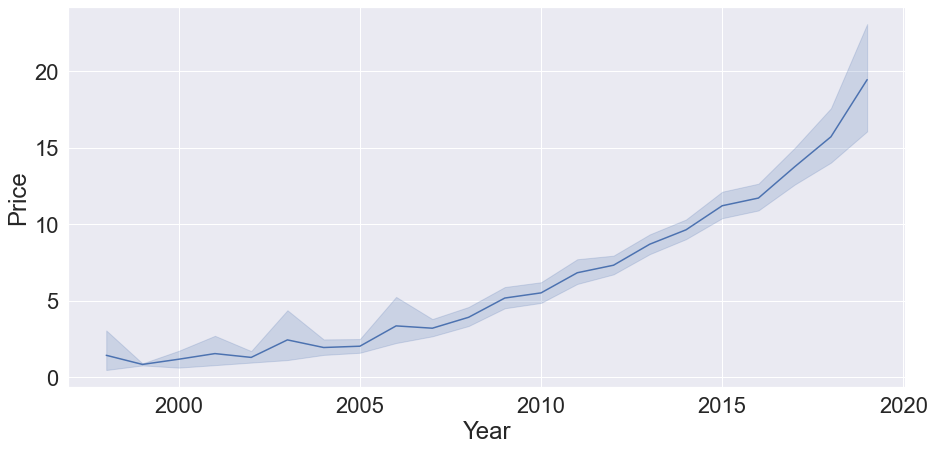

In [86]:
# How does Price vary by year
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',
             data=df);

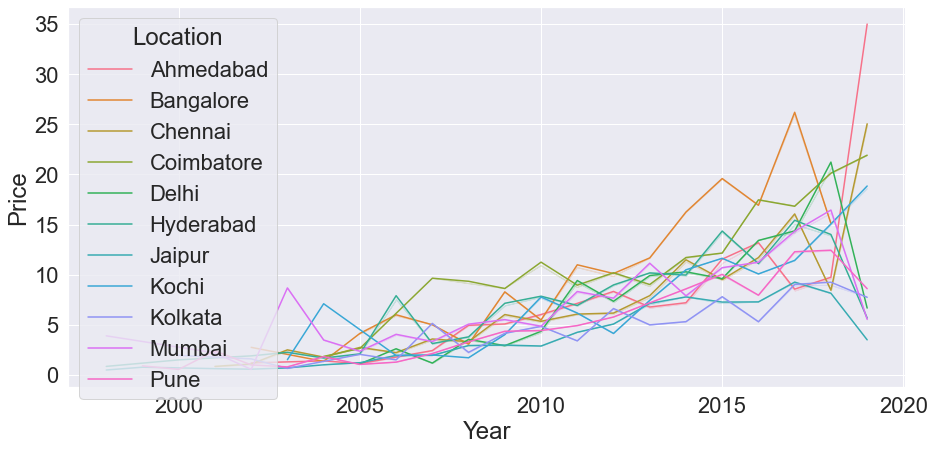

In [87]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',hue='Location',ci=0,
             data=df);

* This shows essentially what we guessed - although some cities don't reach the same high price levels there is heavy overlap and they follow the same general trend

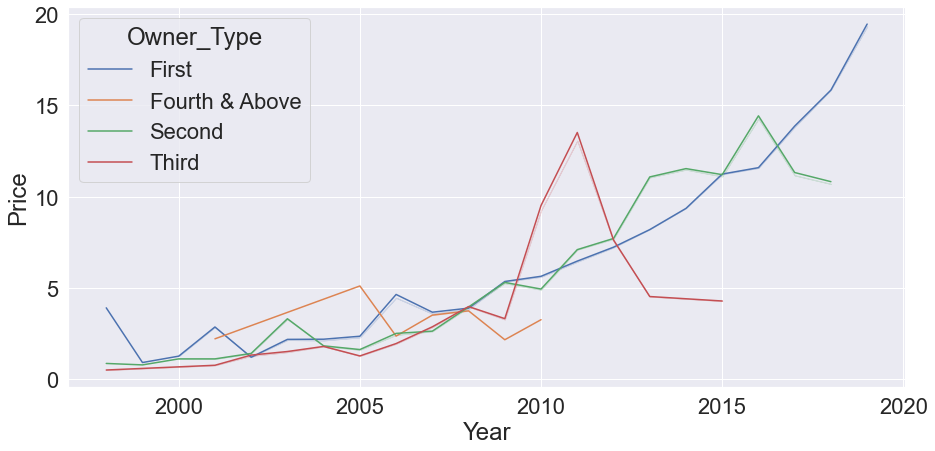

In [88]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',hue='Owner_Type',ci=0,
             data=df);

* This shows what we determined before, but with some intesting differences
* although fist and second owner cars do command a higher price, that is not necessarily the case for older vehicles
* if an old vehicle is only owned by 1 or 2 people it might not be worth any more than one owned by 3 or 4
* in fact where the graphs oeverlap there doesn't appear to be much difference at all

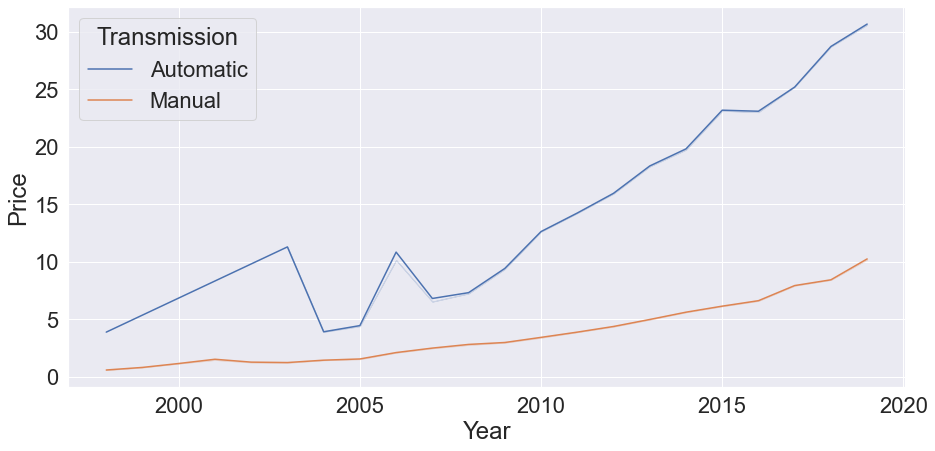

In [89]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',hue='Transmission',ci=0,
             data=df);

* Automatic vehicles commend a much higher average sales price vs manual transmission cars

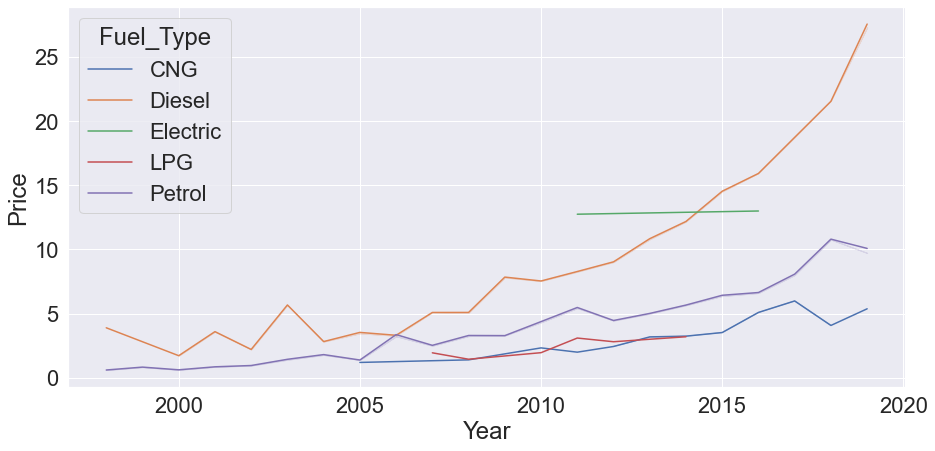

In [90]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',ci=0,
             data=df);

* Diesel vehicles appear to command the highest price 
* Newer diesel vehicles look to command an even higher price than the trend of the other fuel types
* by this measure it almost looks like if we took diesels out the trand of price increase for newer vehicles would not be nearly as strong

## Pandas Profiling

In [91]:
from pandas_profiling import ProfileReport

In [92]:
profile = ProfileReport(df, title="Cars4UPandas Profiling Report")
profile

#### Profile Observations

* Year variable is right skewed to newer modes
* Diesel fueled dominates the set, followed closely by pretrol, other fuels are not heavily represented
* Manual Transmissions account for over twice the vehicles vs. automatic
* First Owner_Type dominates the set with over 5x that of the next highest (second)
* Mileage looks very evenly distributed
* Engine and Power variables look to have similar distribution shape with a positive right skew
* Seats are dominated with 5 value
* Price has a positive right skew with one variable on the far right much higher

Correlations
* Price has highest correlation with power, engine, and year variables respectively

# 6. Data Preperation

### Outlier Treatment
* Some of our data still contains lots of outliers
* Although those outliers are legitimate data points (and we have treated the ones that aren't) we don't want to include them in our model because they are unrepresentitive of of the overall data and may lead to false conclusions

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   category
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6019 non-null   float64 
 8   Engine             6019 non-null   int64   
 9   Power              6019 non-null   float64 
 10  Seats              6019 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(4), float64(4), int64(3), object(1)
memory usage: 607.6+ KB


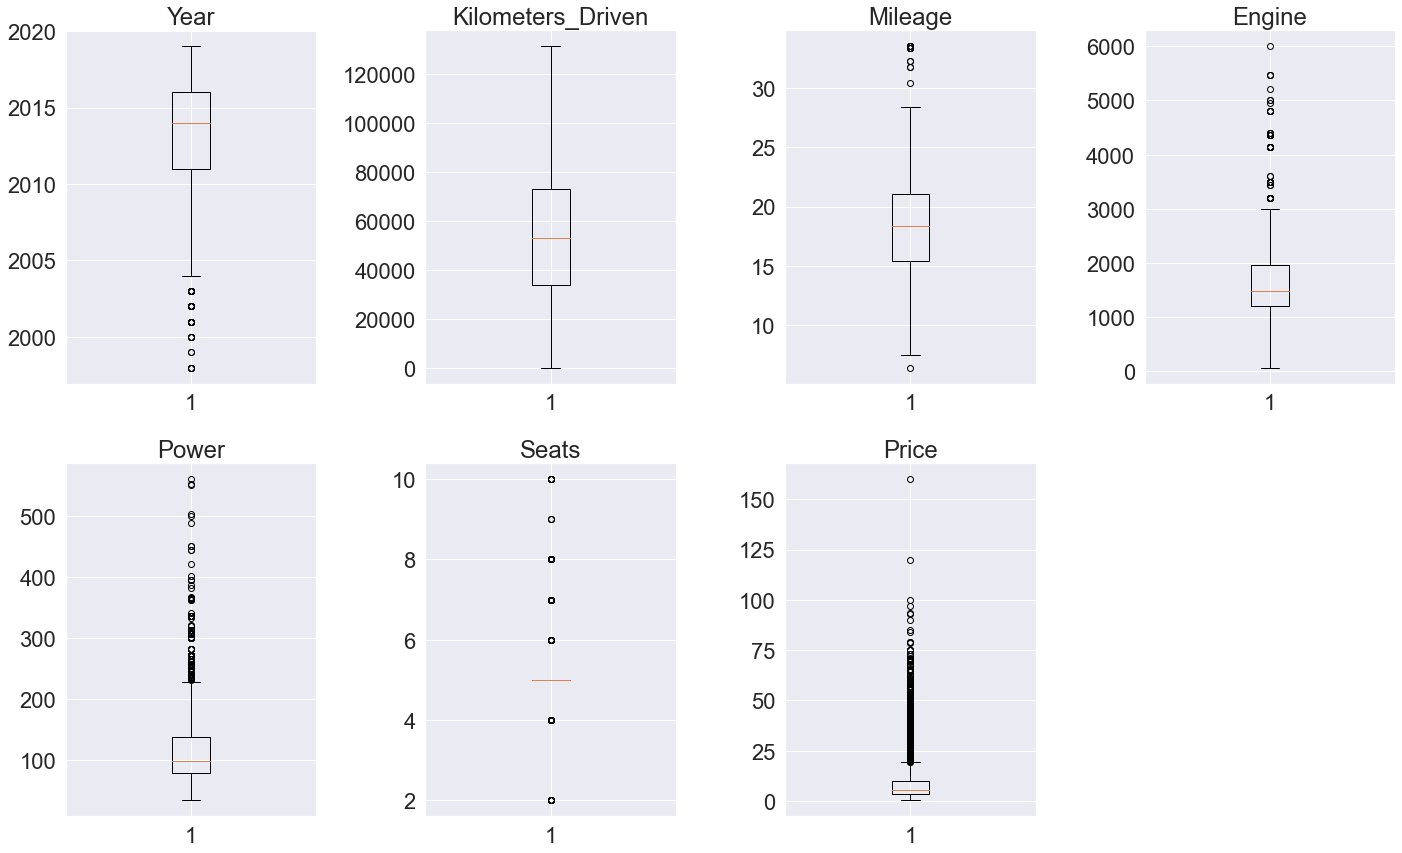

In [94]:
# Lets boxplot all of the numeric varaibles to show their outlier values
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Observations
* all of the variables have significantle high numbers of outliers (except KM_Driven which we reated earlier)
* Our dependent variable Price has many outlier values
* since so much of the data contains outlier values (that are real data) I don't think it would be prudent to remove them since they probably contain valuable data

# 7. Model Building

In [95]:
df.head()

Name    Location  Year  Kilometers_Driven  \
S.No.                                                                          
0                Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                          Honda Jazz V     Chennai  2011              46000   
3                     Maruti Ertiga VDI     Chennai  2012              87000   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

      Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
S.No.                                                                           
0           CNG       Manual      First    26.60     998   58.16    5.0   1.75  
1        Diesel       Manual      First    19.67    1582  126.20    5.0  12.50  
2        Petrol       Manual      First    18.20    1199   88.70    5.0   4.50  
3        Diesel       Manual      First    20.77    1248   88.76    7.0   6.00  
4        Diesel    Automatic     Second    15.20    1968  140.80    5.0  17.74

## Separate your X and Y Variables
- X = all the independent variables in the set
- Y = our dependent variable = Price

In [96]:

#Defining X and y variables
X = df.drop(['Price'], axis=1)
y = df[['Price']]

print(X.head())
print(y.head())

                                   Name    Location  Year  Kilometers_Driven  \
S.No.                                                                          
0                Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1      Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                          Honda Jazz V     Chennai  2011              46000   
3                     Maruti Ertiga VDI     Chennai  2012              87000   
4       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

      Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  
S.No.                                                                    
0           CNG       Manual      First    26.60     998   58.16    5.0  
1        Diesel       Manual      First    19.67    1582  126.20    5.0  
2        Petrol       Manual      First    18.20    1199   88.70    5.0  
3        Diesel       Manual      First    20.77    1248   88.76    7

## Create Dummy Variables
* We need to add columns to separate our categorical independent variables

In [97]:
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)
X.head()

Name  Year  Kilometers_Driven  Mileage  \
S.No.                                                                       
0                Maruti Wagon R LXI CNG  2010              72000    26.60   
1      Hyundai Creta 1.6 CRDi SX Option  2015              41000    19.67   
2                          Honda Jazz V  2011              46000    18.20   
3                     Maruti Ertiga VDI  2012              87000    20.77   
4       Audi A4 New 2.0 TDI Multitronic  2013              40670    15.20   

       Engine   Power  Seats  Location_Bangalore  Location_Chennai  \
S.No.                                                                
0         998   58.16    5.0                   0                 0   
1        1582  126.20    5.0                   0                 0   
2        1199   88.70    5.0                   0                 1   
3        1248   88.76    7.0                   0                 1   
4        1968  140.80    5.0                   0                 0   

       Location_Coimbatore  Location_Delhi  Location_Hyderabad  \
S.No.                                                            
0                        0               0                   0   
1                        0               0                   0   
2                        0               0                   0   
3                        0               0                   0   
4                        1               0                   0   

       Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
S.No.                                                                       
0                    0               0                 0                1   
1                    0               0                 0                0   
2                    0               0                 0                0   
3                    0               0                 0                0   
4                    0               0                 0                0   

       Location_Pune  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  \
S.No.                                                                       
0                  0                 0                   0              0   
1                  1                 1                   0              0   
2                  0                 0                   0              0   
3                  0                 1                   0              0   
4                  0                 1                   0              0   

       Fuel_Type_Petrol  Transmission_Manual  Owner_Type_Fourth & Above  \
S.No.                                                                     
0                     0                    1                          0   
1                     0                    1                          0   
2                     1                    1                          0   
3                     0                    1                          0   
4                     0                    0                          0   

       Owner_Type_Second  Owner_Type_Third  
S.No.                                       
0                      0                 0  
1                      0                 0  
2                      0                 0  
3                      0                 0  
4                      1                 0

In [98]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
X_train.head()

Name  Year  Kilometers_Driven  \
S.No.                                                                   
4201   Volkswagen Polo Diesel Trendline 1.2L  2011              77000   
4383                      Hyundai i10 Sportz  2016              19947   
1779                  Mahindra XUV500 W8 2WD  2014              70963   
4020                   Maruti Swift VDI BSIV  2013             115195   
3248   Volkswagen Polo Petrol Trendline 1.2L  2011              58752   

       Mileage  Engine  Power  Seats  Location_Bangalore  Location_Chennai  \
S.No.                                                                        
4201     22.07    1199   73.9    5.0                   0                 0   
4383     20.36    1197   78.9    5.0                   0                 0   
1779     15.10    2179  140.0    7.0                   0                 0   
4020     25.20    1248   74.0    5.0                   0                 0   
3248     16.47    1198   73.9    5.0                   0                 0   

       Location_Coimbatore  Location_Delhi  Location_Hyderabad  \
S.No.                                                            
4201                     0               0                   0   
4383                     0               0                   1   
1779                     0               0                   0   
4020                     0               0                   0   
3248                     0               0                   0   

       Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
S.No.                                                                       
4201                 1               0                 0                0   
4383                 0               0                 0                0   
1779                 0               1                 0                0   
4020                 0               0                 1                0   
3248                 0               1                 0                0   

       Location_Pune  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  \
S.No.                                                                       
4201               0                 1                   0              0   
4383               0                 0                   0              0   
1779               0                 1                   0              0   
4020               0                 1                   0              0   
3248               0                 0                   0              0   

       Fuel_Type_Petrol  Transmission_Manual  Owner_Type_Fourth & Above  \
S.No.                                                                     
4201                  0                    1                          0   
4383                  1                    1                          0   
1779                  0                    1                          0   
4020                  0                    1                          0   
3248                  1                    1                          0   

       Owner_Type_Second  Owner_Type_Third  
S.No.                                       
4201                   0                 0  
4383                   0                 0  
1779                   0                 0  
4020                   0                 0  
3248                   0                 0

## Choose Model, Train and Evaluate

In [100]:
#Fitting linear model

#from sklearn.linear_model import LinearRegression
#linearregression = LinearRegression()                                    
#linearregression.fit(X_train, y_train)                                  

#print("Intercept of the linear equation:", linearregression.intercept_) 
#print("\nCOefficients of the equation are:", linearregression.coef_)

#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#pred = linearregression.predict(X_test)

#### When we try to run the above code we get an error

In [101]:
# We need to drop the Name column and try again
df.drop(['Name'],axis=1,inplace=True)

In [102]:
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
S.No.                                                                          
0          Mumbai  2010              72000       CNG       Manual      First   
1            Pune  2015              41000    Diesel       Manual      First   
2         Chennai  2011              46000    Petrol       Manual      First   
3         Chennai  2012              87000    Diesel       Manual      First   
4      Coimbatore  2013              40670    Diesel    Automatic     Second   

       Mileage  Engine   Power  Seats  Price  
S.No.                                         
0        26.60     998   58.16    5.0   1.75  
1        19.67    1582  126.20    5.0  12.50  
2        18.20    1199   88.70    5.0   4.50  
3        20.77    1248   88.76    7.0   6.00  
4        15.20    1968  140.80    5.0  17.74

In [103]:
#Defining X and y variables
X = df.drop(['Price'], axis=1)
y = df[['Price']]

print(X.head())
print(y.head())

         Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
S.No.                                                                          
0          Mumbai  2010              72000       CNG       Manual      First   
1            Pune  2015              41000    Diesel       Manual      First   
2         Chennai  2011              46000    Petrol       Manual      First   
3         Chennai  2012              87000    Diesel       Manual      First   
4      Coimbatore  2013              40670    Diesel    Automatic     Second   

       Mileage  Engine   Power  Seats  
S.No.                                  
0        26.60     998   58.16    5.0  
1        19.67    1582  126.20    5.0  
2        18.20    1199   88.70    5.0  
3        20.77    1248   88.76    7.0  
4        15.20    1968  140.80    5.0  
       Price
S.No.       
0       1.75
1      12.50
2       4.50
3       6.00
4      17.74


In [104]:
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)
X.head()

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  \
S.No.                                                            
0      2010              72000    26.60     998   58.16    5.0   
1      2015              41000    19.67    1582  126.20    5.0   
2      2011              46000    18.20    1199   88.70    5.0   
3      2012              87000    20.77    1248   88.76    7.0   
4      2013              40670    15.20    1968  140.80    5.0   

       Location_Bangalore  Location_Chennai  Location_Coimbatore  \
S.No.                                                              
0                       0                 0                    0   
1                       0                 0                    0   
2                       0                 1                    0   
3                       0                 1                    0   
4                       0                 0                    1   

       Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  \
S.No.                                                                        
0                   0                   0                0               0   
1                   0                   0                0               0   
2                   0                   0                0               0   
3                   0                   0                0               0   
4                   0                   0                0               0   

       Location_Kolkata  Location_Mumbai  Location_Pune  Fuel_Type_Diesel  \
S.No.                                                                       
0                     0                1              0                 0   
1                     0                0              1                 1   
2                     0                0              0                 0   
3                     0                0              0                 1   
4                     0                0              0                 1   

       Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
S.No.                                                        
0                       0              0                 0   
1                       0              0                 0   
2                       0              0                 1   
3                       0              0                 0   
4                       0              0                 0   

       Transmission_Manual  Owner_Type_Fourth & Above  Owner_Type_Second  \
S.No.                                                                      
0                        1                          0                  0   
1                        1                          0                  0   
2                        1                          0                  0   
3                        1                          0                  0   
4                        0                          0                  1   

       Owner_Type_Third  
S.No.                    
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [105]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
X_train.head()

Year  Kilometers_Driven  Mileage  Engine  Power  Seats  \
S.No.                                                           
4201   2011              77000    22.07    1199   73.9    5.0   
4383   2016              19947    20.36    1197   78.9    5.0   
1779   2014              70963    15.10    2179  140.0    7.0   
4020   2013             115195    25.20    1248   74.0    5.0   
3248   2011              58752    16.47    1198   73.9    5.0   

       Location_Bangalore  Location_Chennai  Location_Coimbatore  \
S.No.                                                              
4201                    0                 0                    0   
4383                    0                 0                    0   
1779                    0                 0                    0   
4020                    0                 0                    0   
3248                    0                 0                    0   

       Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  \
S.No.                                                                        
4201                0                   0                1               0   
4383                0                   1                0               0   
1779                0                   0                0               1   
4020                0                   0                0               0   
3248                0                   0                0               1   

       Location_Kolkata  Location_Mumbai  Location_Pune  Fuel_Type_Diesel  \
S.No.                                                                       
4201                  0                0              0                 1   
4383                  0                0              0                 0   
1779                  0                0              0                 1   
4020                  1                0              0                 1   
3248                  0                0              0                 0   

       Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
S.No.                                                        
4201                    0              0                 0   
4383                    0              0                 1   
1779                    0              0                 0   
4020                    0              0                 0   
3248                    0              0                 1   

       Transmission_Manual  Owner_Type_Fourth & Above  Owner_Type_Second  \
S.No.                                                                      
4201                     1                          0                  0   
4383                     1                          0                  0   
1779                     1                          0                  0   
4020                     1                          0                  0   
3248                     1                          0                  0   

       Owner_Type_Third  
S.No.                    
4201                  0  
4383                  0  
1779                  0  
4020                  0  
3248                  0

In [107]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)  

Intercept of the linear equation: [-1517.57970563]

Coefficients of the equation are: [[ 7.56545392e-01 -5.25447021e-05 -9.94860004e-02  2.09102596e-03
   1.20885141e-01 -9.71916747e-01  1.60130555e+00  9.11496249e-01
   2.44099627e+00 -3.03313985e-01  2.22155267e+00  1.18243918e+00
   1.41489751e-02 -1.63583898e+00 -1.22980138e+00  6.50422417e-01
  -1.10887878e+00  8.65750664e+00  1.64495868e-01 -3.76387690e+00
  -2.19163976e+00  1.36334259e+00 -3.82974456e-02  8.72864094e-01]]


## 8. Linear Regression Model Performance Indicators

In [108]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

3.7739387725778846

The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [109]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

6.029718819308455

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [110]:
# R2 Squared: on test
r2_score(y_test, pred)

0.7044072897883887

- R^2 (coefficient of determination) regression score function.

- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

- R^2 value is 0.70 which means that in this model independent variables are able to explain 70% of variances in dependent variable

# 9. Statsmodels

In [111]:
# Lets us build linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     438.5
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:25   Log-Likelihood:                -13520.
No. Observations:                4213   AIC:                         2.709e+04
Df Residuals:                    4188   BIC:                         2.725e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

** Observation**
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, Price decreases with their increase.
- Positive values of coefficient shows that, Price increases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 



## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.71**, which is good!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Country, status, Adult mortality and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-1517.58**

3. **Year**: It represents the change in the output Y due to a change of one unit in the Year (everything else held constant). I.E. for every year older a vehicle is its price will decrease by ~.76 LKH
4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 

    Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
  - A p-value of less than 0.05 is considered to be statistically significant.

   
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

# 10. Let's rebuild the model with outliers removed

### Outliers Treatment

In [112]:
# Lets treat outliers by flooring and capping
# define a funtction that treats the outliers by removing values from numerical columns beyond 
# 1.5 * the IQR (inner quartile range) of the variable
#def treat_outliers(df,col):
  
    #Q1=df[col].quantile(0.25) # 25th quantile
    #Q3=df[col].quantile(0.75)  # 75th quantile
    #IQR=Q3-Q1
    #Lower_Whisker = Q1 - 1.5*IQR 
    #Upper_Whisker = Q3 + 1.5*IQR
    #df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    #return df

#def treat_outliers_all(df, col_list):
    #treat outlier in all numerical varaibles
    #col_list: list of numerical varaibles
    #df: data frame
    #'''
    #for c in col_list:
       # df = treat_outliers(df,c)
        
   # return df
    

In [113]:
# selects all of the numerical columns of the dataset and run the outlier treatment function on them
# numerical_col = df.select_dtypes(include=np.number).columns.tolist()
# df = treat_outliers_all(df,numerical_col)

In [114]:
# lets look at box plot to see if outliers has been treated or not
# plt.figure(figsize=(20,30))

#for i, variable in enumerate(numeric_columns):
                     # plt.subplot(5,4,i+1)
                     # plt.boxplot(df[variable],whis=1.5)
                     # plt.tight_layout()
                     # plt.title(variable)

#plt.show()

### This successfully removed the outliers, however it also took out all data for cars with <5> seats 
* I don't think this is wise so I'm going to convert the seat variable to categorical and rerun the outlier treatment

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   int64   
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   float64 
 10  Price              6019 non-null   float64 
dtypes: category(4), float64(4), int64(3)
memory usage: 560.6 KB


In [116]:
#convert Seats variable as categorical Datatype
df['Seats'] = df['Seats'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   int64   
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   category
 10  Price              6019 non-null   float64 
dtypes: category(5), float64(3), int64(3)
memory usage: 519.8 KB


In [117]:
# Lets treat outliers by flooring and capping
# define a funtction that treats the outliers by removing values from numerical columns beyond 
# 1.5 * the IQR (inner quartile range) of the variable
def treat_outliers(df,col):
  
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    #treat outlier in all numerical varaibles
    #col_list: list of numerical varaibles
    #df: data frame
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [118]:
#selects all of the numerical columns of the dataset and run the outlier treatment function on them
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

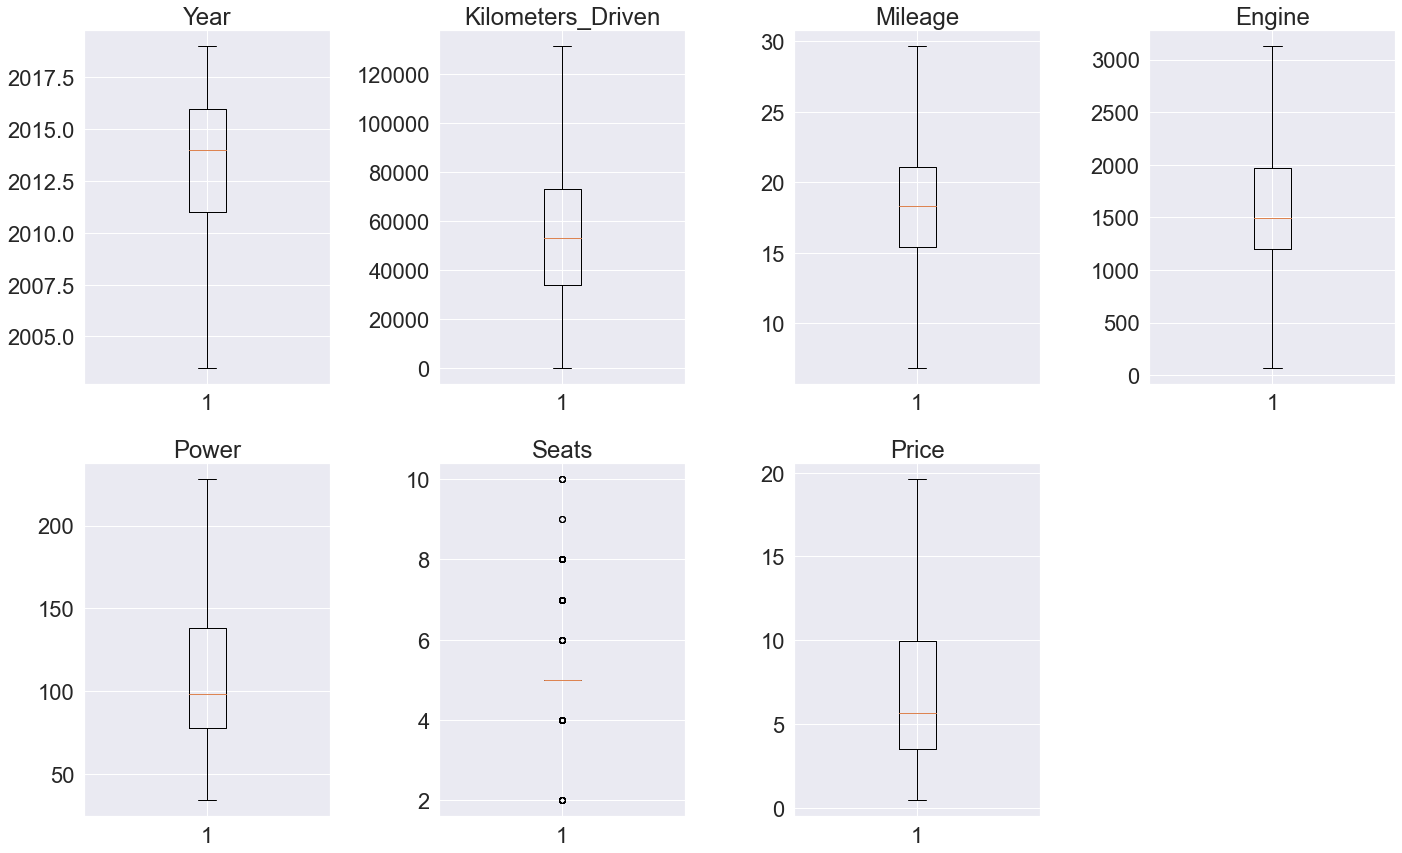

In [119]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Now all of the outlier values except for the seat category have been removed from the set

#### Before continuing lets convert seat back to an integer datatype so it's easier to work with

In [120]:
#convert Seats variable as integer Datatype
df['Seats'] = df['Seats'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   float64 
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   float64 
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   int64   
 10  Price              6019 non-null   float64 
dtypes: category(4), float64(5), int64(2)
memory usage: 560.6 KB


In [121]:
df.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  6019.000000        6019.000000  6019.000000  6019.000000  6019.000000   
mean   2013.374149       56106.896661    18.334797  1613.003406   111.195406   
std       3.213540       30040.626708     4.127369   567.765941    45.991748   
min    2003.500000         171.000000     6.850000    72.000000    34.200000   
25%    2011.000000       34000.000000    15.400000  1198.000000    78.000000   
50%    2014.000000       53000.000000    18.330000  1493.000000    98.600000   
75%    2016.000000       73000.000000    21.100000  1969.000000   138.030000   
max    2019.000000      131500.000000    29.650000  3125.500000   228.075000   

             Seats        Price  
count  6019.000000  6019.000000  
mean      5.277621     7.708463  
std       0.803479     5.769853  
min       2.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.640000  
75%       5.000000     9.950000  
max      10.000000    19.625000

## Now lets retest our model with the outlier treated data

In [122]:
#Defining X and y variables
X = df.drop(['Price'], axis=1) #independent variables
y = df[['Price']] #dependent variable

print(X.head())
print(y.head())

         Location    Year  Kilometers_Driven Fuel_Type Transmission  \
S.No.                                                                 
0          Mumbai  2010.0              72000       CNG       Manual   
1            Pune  2015.0              41000    Diesel       Manual   
2         Chennai  2011.0              46000    Petrol       Manual   
3         Chennai  2012.0              87000    Diesel       Manual   
4      Coimbatore  2013.0              40670    Diesel    Automatic   

      Owner_Type  Mileage  Engine   Power  Seats  
S.No.                                             
0          First    26.60   998.0   58.16      5  
1          First    19.67  1582.0  126.20      5  
2          First    18.20  1199.0   88.70      5  
3          First    20.77  1248.0   88.76      7  
4         Second    15.20  1968.0  140.80      5  
       Price
S.No.       
0       1.75
1      12.50
2       4.50
3       6.00
4      17.74


In [123]:
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)
X.head()

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  \
S.No.                                                              
0      2010.0              72000    26.60   998.0   58.16      5   
1      2015.0              41000    19.67  1582.0  126.20      5   
2      2011.0              46000    18.20  1199.0   88.70      5   
3      2012.0              87000    20.77  1248.0   88.76      7   
4      2013.0              40670    15.20  1968.0  140.80      5   

       Location_Bangalore  Location_Chennai  Location_Coimbatore  \
S.No.                                                              
0                       0                 0                    0   
1                       0                 0                    0   
2                       0                 1                    0   
3                       0                 1                    0   
4                       0                 0                    1   

       Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  \
S.No.                                                                        
0                   0                   0                0               0   
1                   0                   0                0               0   
2                   0                   0                0               0   
3                   0                   0                0               0   
4                   0                   0                0               0   

       Location_Kolkata  Location_Mumbai  Location_Pune  Fuel_Type_Diesel  \
S.No.                                                                       
0                     0                1              0                 0   
1                     0                0              1                 1   
2                     0                0              0                 0   
3                     0                0              0                 1   
4                     0                0              0                 1   

       Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
S.No.                                                        
0                       0              0                 0   
1                       0              0                 0   
2                       0              0                 1   
3                       0              0                 0   
4                       0              0                 0   

       Transmission_Manual  Owner_Type_Fourth & Above  Owner_Type_Second  \
S.No.                                                                      
0                        1                          0                  0   
1                        1                          0                  0   
2                        1                          0                  0   
3                        1                          0                  0   
4                        0                          0                  1   

       Owner_Type_Third  
S.No.                    
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [124]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
X_train1.head()

Year  Kilometers_Driven  Mileage  Engine  Power  Seats  \
S.No.                                                             
4201   2011.0              77000    22.07  1199.0   73.9      5   
4383   2016.0              19947    20.36  1197.0   78.9      5   
1779   2014.0              70963    15.10  2179.0  140.0      7   
4020   2013.0             115195    25.20  1248.0   74.0      5   
3248   2011.0              58752    16.47  1198.0   73.9      5   

       Location_Bangalore  Location_Chennai  Location_Coimbatore  \
S.No.                                                              
4201                    0                 0                    0   
4383                    0                 0                    0   
1779                    0                 0                    0   
4020                    0                 0                    0   
3248                    0                 0                    0   

       Location_Delhi  Location_Hyderabad  Location_Jaipur  Location_Kochi  \
S.No.                                                                        
4201                0                   0                1               0   
4383                0                   1                0               0   
1779                0                   0                0               1   
4020                0                   0                0               0   
3248                0                   0                0               1   

       Location_Kolkata  Location_Mumbai  Location_Pune  Fuel_Type_Diesel  \
S.No.                                                                       
4201                  0                0              0                 1   
4383                  0                0              0                 0   
1779                  0                0              0                 1   
4020                  1                0              0                 1   
3248                  0                0              0                 0   

       Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
S.No.                                                        
4201                    0              0                 0   
4383                    0              0                 1   
1779                    0              0                 0   
4020                    0              0                 0   
3248                    0              0                 1   

       Transmission_Manual  Owner_Type_Fourth & Above  Owner_Type_Second  \
S.No.                                                                      
4201                     1                          0                  0   
4383                     1                          0                  0   
1779                     1                          0                  0   
4020                     1                          0                  0   
3248                     1                          0                  0   

       Owner_Type_Third  
S.No.                    
4201                  0  
4383                  0  
1779                  0  
4020                  0  
3248                  0

### Choose Model, train, and evaluate

In [126]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train1, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)   

Intercept of the linear equation: [-1062.52676921]

Coefficients of the equation are: [[ 5.30391223e-01 -1.98461546e-05 -1.18159028e-01  1.07569607e-03
   6.03623909e-02 -1.06658990e-01  6.70025581e-01 -4.84070708e-02
   4.95814700e-01 -5.70507336e-01  5.95782762e-01  2.35607325e-02
  -2.02054129e-01 -1.46775120e+00 -5.27303831e-01 -1.51276664e-01
   5.67529291e-01  7.42335744e+00 -1.83308116e-01 -1.59351588e+00
  -2.32555752e+00 -6.03122320e-01 -1.67003529e-01 -4.69321821e-01]]


#### Lets look at this vs the first model run

Intercept of the linear equation: [-1517.57970563]

Coefficients of the equation are: [[ 7.56545392e-01 -5.25447021e-05 -9.94860004e-02  2.09102596e-03
   1.20885141e-01 -9.71916747e-01  1.60130555e+00  9.11496249e-01
   2.44099627e+00 -3.03313985e-01  2.22155267e+00  1.18243918e+00
   1.41489751e-02 -1.63583898e+00 -1.22980138e+00  6.50422417e-01
  -1.10887878e+00  8.65750664e+00  1.64495868e-01 -3.76387690e+00
  -2.19163976e+00  1.36334259e+00 -3.82974456e-02  8.72864094e-01]]

### Outliers Treated Model Performance

In [127]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

1.7329260388681047

#### First run MAE: 3.7739387725778846

In [128]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

2.3574244668602797

#### First run RSME: 6.029718819308455

In [129]:
# R2 Squared: on test
r2_score(y_test, pred)

0.8361612943367568

#### First run Root Squared: 0.7044072897883887

### Observations
* all of the model fit indicators decreased a large amount - indicating improvement
* the r2 score jumped from 70% up to almost 84% - indicating in this new model the independent variables now explain approx 84% of the variance in the dependent variable - a large diffence indicating the outlier values were throwing off our model by a fair amount

# 11. Statsmodels - outlier treated data

In [130]:
# Lets us build linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     921.8
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:26   Log-Likelihood:                -9473.0
No. Observations:                4213   AIC:                         1.900e+04
Df Residuals:                    4188   BIC:                         1.915e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

First run result:
  OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     438.5
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:01:19   Log-Likelihood:                -13520.
No. Observations:                4213   AIC:                         2.709e+04
Df Residuals:                    4188   BIC:                         2.725e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1517.5797     81.745    -18.565      0.000   -1677.843   -1357.317
Year                          0.7565      0.041     18.574      0.000       0.677       0.836
Kilometers_Driven         -5.254e-05   4.23e-06    -12.422      0.000   -6.08e-05   -4.43e-05
Mileage                      -0.0995      0.040     -2.475      0.013      -0.178      -0.021
Engine                        0.0021      0.000      4.707      0.000       0.001       0.003
Power                         0.1209      0.004     27.830      0.000       0.112       0.129
Seats                        -0.9719      0.162     -6.017      0.000      -1.289      -0.655
Location_Bangalore            1.6013      0.615      2.604      0.009       0.396       2.807
Location_Chennai              0.9115      0.590      1.544      0.123      -0.246       2.069
Location_Coimbatore           2.4410      0.570      4.285      0.000       1.324       3.558
Location_Delhi               -0.3033      0.574     -0.528      0.597      -1.429       0.822
Location_Hyderabad            2.2216      0.556      3.997      0.000       1.132       3.311
Location_Jaipur               1.1824      0.607      1.949      0.051      -0.007       2.372
Location_Kochi                0.0141      0.568      0.025      0.980      -1.099       1.127
Location_Kolkata             -1.6358      0.581     -2.814      0.005      -2.775      -0.496
Location_Mumbai              -1.2298      0.555     -2.217      0.027      -2.317      -0.142
Location_Pune                 0.6504      0.568      1.146      0.252      -0.463       1.764
Fuel_Type_Diesel             -1.1089      0.992     -1.117      0.264      -3.054       0.837
Fuel_Type_Electric            8.6575      6.131      1.412      0.158      -3.363      20.678
Fuel_Type_LPG                 0.1645      2.359      0.070      0.944      -4.461       4.790
Fuel_Type_Petrol             -3.7639      1.015     -3.710      0.000      -5.753      -1.775
Transmission_Manual          -2.1916      0.278     -7.871      0.000      -2.738      -1.646
Owner_Type_Fourth & Above     1.3633      2.701      0.505      0.614      -3.932       6.659
Owner_Type_Second            -0.0383      0.273     -0.140      0.888      -0.574       0.497
Owner_Type_Third              0.8729      0.703      1.241      0.215      -0.506       2.252
==============================================================================
Omnibus:                     3638.508   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           438184.472
Skew:                           3.542   Prob(JB):                         0.00
Kurtosis:                      52.457   Cond. No.                     5.60e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.

### Observations
* Though there are big improvements on the numbers statsmodels is still indicating there's probably strong multicolinearity in the data - which means essentially some of the independent variables are effecting one-another so they are not as independent as we would like

# 12. Let's check Multicollinearity using VIF scores

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βkis “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                        810126.542208
Year                              2.077566
Kilometers_Driven                 1.884883
Mileage                           3.486577
Engine                            7.451591
Power                             5.833960
Seats                             1.809639
Location_Bangalore                2.471902
Location_Chennai                  2.991631
Location_Coimbatore               3.519679
Location_Delhi                    3.165863
Location_Hyderabad                3.825648
Location_Jaipur                   2.685215
Location_Kochi                    3.573825
Location_Kolkata                  3.134198
Location_Mumbai                   3.993389
Location_Pune                     3.441569
Fuel_Type_Diesel                 28.260700
Fuel_Type_Electric                1.043668
Fuel_Type_LPG                     1.193919
Fuel_Type_Petrol                 28.958347
Transmission_Manual               2.004571
Owner_Type_Fourth &

### Observations

* Engine and Power both exhibit moderate multi colinearity, clearly these variables are correlated
* Fuel Type Diesel and Petrol have very high VIF scores over 28 exhibiting high multicollinearity

# 13. Removing Multicollinearity
 * To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

In [132]:

1
# we drop the one with the highest vif values and check the Adjusted-R Squared
2
X_train2 = X_train1.drop('Fuel_Type_Petrol', axis=1)
3
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
4
print('Series before feature selection: \n\n{}\n'.format(vif_series2))


Series before feature selection: 

const                        813180.059714
Year                              2.047865
Kilometers_Driven                 1.853821
Mileage                           3.402240
Engine                            7.670082
Power                             5.834673
Seats                             1.860895
Location_Bangalore                2.581842
Location_Chennai                  2.997416
Location_Coimbatore               3.583764
Location_Delhi                    3.243937
Location_Hyderabad                3.894416
Location_Jaipur                   2.689022
Location_Kochi                    3.652163
Location_Kolkata                  3.201764
Location_Mumbai                   4.038648
Location_Pune                     3.520144
Fuel_Type_Diesel                  2.366190
Fuel_Type_Electric                1.011622
Fuel_Type_LPG                     1.010494
Transmission_Manual               2.006892
Owner_Type_Fourth & Above         1.008619
Owner_Type_Second  

In [133]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     957.4
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9481.6
No. Observations:                4213   AIC:                         1.901e+04
Df Residuals:                    4189   BIC:                         1.916e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Observations
* Adjusted R-squared has dropped from .84 to .839 suggesting our removal has reduced some of the multicolinearity

In [134]:
# Lets drop the 2nd highest VIF score variable : 'Engine' and retest
1
# we drop the one with the highest vif values and check the Adjusted-R Squared
2
X_train3 = X_train2.drop('Engine', axis=1)
3
vif_series2 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
4
print('Series before feature selection: \n\n{}\n'.format(vif_series2))



Series before feature selection: 

const                        813163.161518
Year                              2.047726
Kilometers_Driven                 1.846413
Mileage                           2.782114
Power                             3.259528
Seats                             1.623330
Location_Bangalore                2.581480
Location_Chennai                  2.997304
Location_Coimbatore               3.583623
Location_Delhi                    3.243591
Location_Hyderabad                3.894396
Location_Jaipur                   2.688828
Location_Kochi                    3.652160
Location_Kolkata                  3.201753
Location_Mumbai                   4.037984
Location_Pune                     3.520118
Fuel_Type_Diesel                  1.956930
Fuel_Type_Electric                1.007404
Fuel_Type_LPG                     1.010447
Transmission_Manual               2.006594
Owner_Type_Fourth & Above         1.008586
Owner_Type_Second                 1.168844
Owner_Type_Third   

### Now we have removed the variables exibiting moderate to high multicolinearity from the model - lets retest

In [135]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     988.7
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9503.8
No. Observations:                4213   AIC:                         1.905e+04
Df Residuals:                    4190   BIC:                         1.920e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Observations
* since we removed our 'Engine' variable adjusted R-Square is now down to .838 suggesting doing so removed more multicolinearity - thus we'll proceed with the OLS model 2

# 14. Lets remove variables with p values >.05 (insignificant) to further hone our model

- Seats, Location_Chennai, Location_Jaipur, Location_Kochi, Location_Pune, Fuel_Type_LPG, and all of the Owner_Tyoe variables  have p value greater than 0.05, so they are not significant, we'll drop them
- But sometimes p values change after dropping a variable, so we'll not drop all variables at once, instead will drop them one by one 

### Location_Jaipur  has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [136]:
X_train4 = X_train3.drop(['Location_Jaipur'], axis=1)

In [137]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1036.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9503.9
No. Observations:                4213   AIC:                         1.905e+04
Df Residuals:                    4191   BIC:                         1.919e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Location_Chennai has the next highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [138]:
X_train5 = X_train4.drop(['Location_Chennai'], axis=1)

In [139]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1088.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9503.9
No. Observations:                4213   AIC:                         1.905e+04
Df Residuals:                    4192   BIC:                         1.918e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Owner_Type_Fourth & Above has the next highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [140]:
X_train6 = X_train5.drop(['Owner_Type_Fourth & Above'], axis=1)

In [141]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1145.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9504.1
No. Observations:                4213   AIC:                         1.905e+04
Df Residuals:                    4193   BIC:                         1.918e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1065.0267    

### Location_Pune has the next highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [142]:
X_train7 = X_train6.drop(['Location_Pune'], axis=1)

In [143]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1209.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9504.4
No. Observations:                4213   AIC:                         1.905e+04
Df Residuals:                    4194   BIC:                         1.917e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1064.6767    

### Seats has the next highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [144]:
X_train8 = X_train7.drop(['Seats'], axis=1)

In [145]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1280.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9504.8
No. Observations:                4213   AIC:                         1.905e+04
Df Residuals:                    4195   BIC:                         1.916e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1070.6391    

* We saw a drop in the condition number from 5.7 to 5.58 after dropping Seats

### Location_Kochi has the next highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [146]:
X_train9 = X_train8.drop(['Location_Kochi'], axis=1)

In [147]:
olsmod8 = sm.OLS(y_train, X_train9)
olsres8 = olsmod8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1360.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9505.4
No. Observations:                4213   AIC:                         1.904e+04
Df Residuals:                    4196   BIC:                         1.915e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1065.0940    

### Owner_Type_Second has the next highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [148]:
X_train10 = X_train9.drop(['Owner_Type_Second'], axis=1)

In [149]:
olsmod9 = sm.OLS(y_train, X_train10)
olsres9 = olsmod9.fit()
print(olsres9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1450.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9506.5
No. Observations:                4213   AIC:                         1.905e+04
Df Residuals:                    4197   BIC:                         1.915e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1076.9398    

### Owner_Type_Third has the next highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [150]:
X_train11 = X_train10.drop(['Owner_Type_Third'], axis=1)

In [151]:
olsmod10 = sm.OLS(y_train, X_train11)
olsres10 = olsmod10.fit()
print(olsres10.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1553.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9507.5
No. Observations:                4213   AIC:                         1.905e+04
Df Residuals:                    4198   BIC:                         1.914e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1084.2119    

### Finally Fuel_Type_LPG has the next highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [152]:
X_train12 = X_train11.drop(['Fuel_Type_LPG'], axis=1)

In [153]:
olsmod11 = sm.OLS(y_train, X_train12)
olsres11 = olsmod11.fit()
print(olsres11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1672.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:27   Log-Likelihood:                -9508.9
No. Observations:                4213   AIC:                         1.905e+04
Df Residuals:                    4199   BIC:                         1.913e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1082.7105    

## All of the Variables with p value < .05 have been removed from the training model
* our condition number has been reduced from 5.71e+07 to 5.24e+07 suggesting our set is exhibiting less multicolinearity

### Now no feature has p value greater than 0.05, so we'll consider features in X_train12 as the final ones and olsres11 as final model

* Now Adjusted R-squared is 0.838, Our model is able to explain 83.8% of variance that shows model is good.
* The Adjusted-R squared in Olsres0 was 0.840 (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.

# 15. Now we'll check rest of the assumptions on model - olsreg11
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

### Mean of residuals should be 0

In [154]:
residual= olsres11.resid
np.mean(residual)

8.321065439134918e-12

* Good, our mean of residuals is approaching 0

### TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [155]:
residual=olsres11.resid
fitted=olsres11.fittedvalues #predicted values

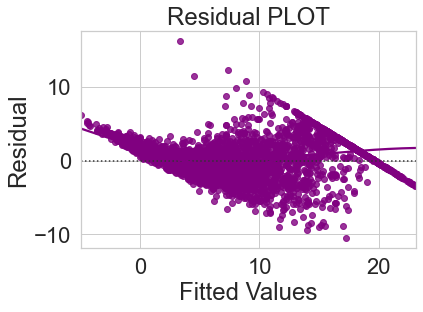

In [156]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

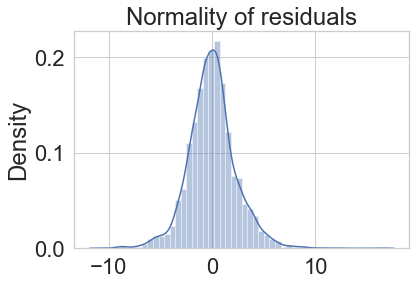

In [157]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()
# This is showing a normal distribution of the residuals

* Residuals have have a very normal distribution curve with no apparent skewness

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

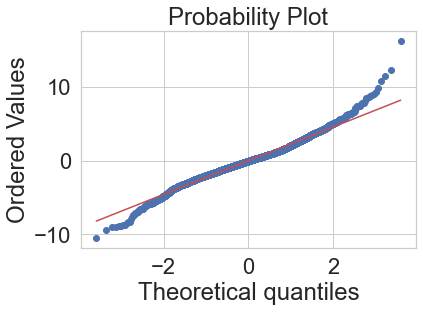

In [158]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [159]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9789488315582275, pvalue=1.593579886789229e-24)

### TEST FOR HOMOSCEDASTICITY

* Test -goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [160]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train12)
lzip(name, test)

[('F statistic', 1.0874100224964627), ('p-value', 0.02765850318177455)]

### Unfortunately the p value is <.05 therefore the residuals are showing some heterscedacity, I was concerned about this based on the residual plot, I'm not sure how to address this

# 16. Predicting on the test data

In [161]:
X_train12.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Power',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Transmission_Manual'],
      dtype='object')

In [162]:
# Selecting columns from test data that we used to create our final model
X_test_final = X_test[X_train12.columns]

In [163]:
X_test_final.head()

const    Year  Kilometers_Driven    Mileage       Power  \
S.No.                                                            
2868     1.0  2013.0              69000  23.400000   74.000000   
5924     1.0  2017.0              26741  15.400000  120.000000   
3764     1.0  2014.0              86000  15.100000  140.000000   
4144     1.0  2016.0              52000  25.000000   69.010000   
2780     1.0  2009.0             100000  18.342185  112.765214   

       Location_Bangalore  Location_Coimbatore  Location_Delhi  \
S.No.                                                            
2868                    0                    0               0   
5924                    0                    0               0   
3764                    0                    0               1   
4144                    0                    0               0   
2780                    0                    0               0   

       Location_Hyderabad  Location_Kolkata  Location_Mumbai  \
S.No.                                                          
2868                    1                 0                0   
5924                    0                 0                0   
3764                    0                 0                0   
4144                    0                 0                0   
2780                    0                 0                0   

       Fuel_Type_Diesel  Fuel_Type_Electric  Transmission_Manual  
S.No.                                                             
2868                  1                   0                    1  
5924                  1                   0                    1  
3764                  1                   0                    1  
4144                  1                   0                    1  
2780                  0                   0                    1

In [164]:
y_pred = olsres11.predict(X_test_final)

### Checking the performance on train and test: metric used - RMSE

In [165]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 2.3119892741074275
Test error: 2.3761997303939717


### Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting.
### Hence we can conclude the model "olsres11" is good for prediction as well as inference purpose

In [166]:
olsmod11 = sm.OLS(y_train, X_train12)
olsres11 = olsmod11.fit()
print(olsres11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1672.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:47:30   Log-Likelihood:                -9508.9
No. Observations:                4213   AIC:                         1.905e+04
Df Residuals:                    4199   BIC:                         1.913e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1082.7105    

#### Observations
* Now this is our final model which follows all the assumptions and this can be used for interpretations

    1. Year is very significant, we can see by its positive (~ 0.54) coefficient we can predict as year  increases by one unit it will increase price by over half a lkh by itself
    2. Kilometers_Driven is significant as this number increase it will decrease price. Note the coeficient value is very low, but consider vehicle mileage increases pretty rapidly to large numbers - thus it may have a strong effect
    3. Mileage is significant - as mileage decreses by 1 unit it brings down price by ~ .15 lkh
    4. Power is slightly positively significant (~.07) so more powerful cars yield higher prices
    5. Location of the vehicle purchase defintly have high impact on price, Bangalore (~ .73) has the highest positive correlation to price, Kolkata has the lowest (~ -1.35)
    6. Diesel (~ 2.42) and Electric (~ 8.17) powered vehicles command significantly higher prices
    7. Manual Transmissions yield negatively significant prices (~ -2.29) suggesting automatic  transmissions yield higher values

# 17. Forward Feature Selection 
### forward feature selection starts with an empty model and adds in variables one by one.
* In each forward step, you add the one variable that gives the single best improvement to your model.

In [167]:
X_train_new = X_train2.drop('const', axis = 1)

* We'll use forward feature selection on variables, we received after removing multicollinearity
* Also we'll remove const term, because sklearn adds that automatically unlike statmodels

In [168]:

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.lin

In [169]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4201 to 860
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       4213 non-null   float64
 1   Kilometers_Driven          4213 non-null   int64  
 2   Mileage                    4213 non-null   float64
 3   Engine                     4213 non-null   float64
 4   Power                      4213 non-null   float64
 5   Seats                      4213 non-null   int64  
 6   Location_Bangalore         4213 non-null   uint8  
 7   Location_Chennai           4213 non-null   uint8  
 8   Location_Coimbatore        4213 non-null   uint8  
 9   Location_Delhi             4213 non-null   uint8  
 10  Location_Hyderabad         4213 non-null   uint8  
 11  Location_Jaipur            4213 non-null   uint8  
 12  Location_Kochi             4213 non-null   uint8  
 13  Location_Kolkata           4213 non-null   uin

In [170]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 23,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.7s finished

[2021-04-18 12:47:32] Features: 1/23 -- score: 0.6519346187730106[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    2.6s finished

[2021-04-18 12:47:34] Features: 2/23 -- score: 0.7831849477111451[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished

[2021-04-18 12:47:35] Features: 3/23 -- score: 0.7983363873307481[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

### We can see that Adjusted-R square starts decreasing after addition of 17th feature, so we will proceed only with best 16 features

Now we'll change k_features to 18, where k_features denotes "Number of features to select"

In [171]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 16,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished

[2021-04-18 12:47:43] Features: 1/16 -- score: 0.6519346187730106[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.5s finished

[2021-04-18 12:47:43] Features: 2/16 -- score: 0.7831849477111451[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.7s finished

[2021-04-18 12:47:44] Features: 3/16 -- score: 0.7983363873307481[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [172]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 6, 8, 9, 10, 13, 14, 16, 17, 18, 19, 22]


In [173]:
X_train2.columns[feat_cols]

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Seats',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Kochi', 'Location_Kolkata', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Owner_Type_Second'],
      dtype='object')

### Now we will fit a sklearn model using these features only

In [174]:
X_train_final = X_train2[X_train2.columns[feat_cols]]

In [175]:
X_test.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [176]:
X_test_final = X_test[X_train_final.columns]

In [177]:
X_test_final.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Seats',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Kochi', 'Location_Kolkata', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Owner_Type_Second'],
      dtype='object')

In [178]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)                              

Intercept of the linear equation: [-1241.53896462]

COefficients of the equation are: [[ 0.00000000e+00  6.21661612e-01 -2.86118350e-05 -2.21525148e-01
   6.51099392e-03 -1.56611672e+00 -3.48854398e-01  4.74049571e-01
  -6.45905483e-01 -3.28295153e-01 -1.86726465e+00 -3.91635219e-01
   2.43972112e+00  1.44292098e+01  1.07058791e+00 -7.18571626e-02]]


In [179]:
# R2 Squared: on train and test
print('r2 score on train data :', r2_score(y_train, predicted))
print('r2 score on test data :', r2_score(y_test, pred))

r2 score on train data : 0.7466826642246932
r2 score on test data : 0.7394139911393609


In [180]:
# RMSE on train and test data
print('rmse on train data :', mean_squared_error(y_train, predicted)**0.5)
print('rmse on test data :', mean_squared_error(y_test, pred)**0.5)

rmse on train data : 2.8918652980246744
rmse on test data : 2.9730696228745352


### We can see the model fit based on forward selection is pretty good, with an R2 of .739 the model accounts for about 74% of the variation of price

* The results aren't the same olsreg11 has r2 of .838, which means that model accounts for about 10% more variation in the dependent variable
* In this case it was worthwhile to remove p-values manually to determine significant variables and hone our model

# 18. FFS 2. Just for curiosity sake, let's run the forward selection on the original x_train with the dataset outliers

In [181]:
X_train_new1 = X_train

In [182]:
X_train_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4201 to 860
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       4213 non-null   int64  
 1   Kilometers_Driven          4213 non-null   int64  
 2   Mileage                    4213 non-null   float64
 3   Engine                     4213 non-null   int64  
 4   Power                      4213 non-null   float64
 5   Seats                      4213 non-null   float64
 6   Location_Bangalore         4213 non-null   uint8  
 7   Location_Chennai           4213 non-null   uint8  
 8   Location_Coimbatore        4213 non-null   uint8  
 9   Location_Delhi             4213 non-null   uint8  
 10  Location_Hyderabad         4213 non-null   uint8  
 11  Location_Jaipur            4213 non-null   uint8  
 12  Location_Kochi             4213 non-null   uint8  
 13  Location_Kolkata           4213 non-null   uin

In [183]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 24,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new1, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.5s finished

[2021-04-18 12:47:49] Features: 1/24 -- score: 0.592495919042529[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2021-04-18 12:47:50] Features: 2/24 -- score: 0.7253687969765907[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2021-04-18 12:47:50] Features: 3/24 -- score: 0.7580034867544461[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

### Very interesting! 

#### Features 16/24 -- R2  score:  0.818480589125587

Running the forward feature data on the non-outlier data yielded a peak r2 score of 0.838059, which is just about identical to our r2 score achieved on OLSReg11, suggessting our outlier treatmant and feature removal up to OLSReg11 was successful. Now I know the Forward Feature Selection modeler will account for outliers and should be run prior to processing them out - or at least double checked.

### We can see that Adjusted-R square starts decreasing after addition of 16th feature, so we will proceed only with best 15 features

In [184]:
clf = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(clf,k_features = 16,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new1, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.5s finished

[2021-04-18 12:47:56] Features: 1/16 -- score: 0.592495919042529[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished

[2021-04-18 12:47:57] Features: 2/16 -- score: 0.7253687969765907[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2021-04-18 12:47:57] Features: 3/16 -- score: 0.7580034867544461[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [185]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 6, 8, 9, 10, 13, 14, 16, 17, 19, 20, 23]


In [186]:
X_train.columns[feat_cols]

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Third'],
      dtype='object')

### Now we will fit a sklearn model using these features only

In [187]:
X_train_final1 = X_train[X_train.columns[feat_cols]]

In [188]:
X_test.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [189]:
X_test_final1 = X_test[X_train_final1.columns]

In [190]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final1, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final1)
pred = linearregression.predict(X_test_final1)

Intercept of the linear equation: [-1071.32216529]

Coefficients of the equation are: [[ 5.36713790e-01 -1.88628042e-05 -2.09637592e-01  4.86223576e-04
   4.46537916e-02  7.45947031e-01  5.87253313e-01 -4.03467123e-01
   5.83600832e-01 -1.32812651e+00 -3.75032853e-01  1.01627364e+00
   5.18764909e+00 -1.88949870e+00 -3.01602114e+00 -5.86449469e-01]]


In [191]:
# R2 Squared: on train and test
print('r2 score on train data :', r2_score(y_train, predicted))
print('r2 score on test data :', r2_score(y_test, pred))

r2 score on train data : 0.8212849720166113
r2 score on test data : 0.8238643510568097


In [192]:
# RMSE on train and test data
print('rmse on train data :', mean_squared_error(y_train, predicted)**0.5)
print('rmse on test data :', mean_squared_error(y_test, pred)**0.5)

rmse on train data : 2.4289923145525423
rmse on test data : 2.444292438896346


#### Both r2 score and RMSE  shows that model fitted is good, has no overfitting and can be used for making predictions 

### We can see the model fit based on forward selection is good, with an R2 of .824 the model accounts for about 82% of the variation of price

* The Results of this are now almost equivilant to OLSreg11 (84%), suggesting when we have lots of features Forward selection is just as good as removing p values manually

# 19. Final Observations
* Now this is our final model which follows all the assumptions and this can be used for interpretations

    1. Year is very significant, we can see by its positive (~ 0.54) coefficient we can predict as year  increases by one unit it will increase price by over half a lkh by itself
    2. Kilometers_Driven is significant as this number increase it will decrease price. Note the coeficient value is very low, but consider vehicle mileage increases pretty rapidly to large numbers - thus it may have a strong effect
    3. Mileage is significant - as mileage decreses by 1 unit it brings down price by ~ .15 lkh
    4. Power is slightly positively significant (~.07) so more powerful cars yield higher prices
    5. Location of the vehicle purchase defintly have high impact on price, Bangalore (~ .73) has the highest positive correlation to price, Kolkata has the lowest (~ -1.35)
    6. Diesel (~ 2.42) and Electric (~ 8.17) powered vehicles command significantly higher prices
    7. Manual Transmissions yield negatively significant prices (~ -2.29) suggesting automatic  transmissions yield higher values
          
 ### Our Model explains approximately 82% - 84% of the variance on price from used vehicles in India
 * This suggests it will be useful in predicting price based on the features noted above

## Key Points
    1. Newer used vehicles command significantly higher prices vs. older vehicles (0.5399 lakh addition for each newer year)
    2. Mileage KM_Driven is negatively correlated by price - for every KM put on a car the price will decrease by .00001869 lakh
    3. Mileage Efficiency is negatively correlated with price (more efficient cars are cheaper)
    4. More powerful cars yield significantly higher prices
    5. Diesel vehicles maintain a higher price over time vs. other fuel types (probably not enough data to compare to Electric or Natural Gas). Add 2.42 lakh ($3246.58) for a diesel fueled vehicle
    6. Automatic Transmission Vehicles command a consistently higher price vs Manual cars. Also more expensive cars tend to be Automatic. Subtract 2.29 lakh ($3077.00) for a manual transmission car 
    7. Manual cars are much more common
    8. Some Markets (cities) do command significantly higher or lower prices for example a car in Kolkata costs 1.35 lakh less ($1797.69) while in Bangalore it costs .73 lakh more ($979.34)

## Business Recommendations

* Since new cars yield higher prices, and pass through less owners it may be prudent to stock newer vehicles as they will be more profitable
* Diesel powered, automatic transmission, powerful vehicles consistently command the highest prices. Seek these cars for the highest return
* Cars with lower use will command higher price
* Purchase cars in markets where price is lower (Kolkata, Delhi, Mumbai) and resell them in markets where price is higher (Bangalore, Hyderabad, Coimbatore)